#Inizializzazione

Installazione delle pip di polars e geopolars

In [ ]:
# 1. Aggiorna pip alla versione compatibile
!pip install --upgrade "pip<24.1"

# 2. Installa polars
!pip install polars==1.29.0

!pip install geopolars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.8/34.8 MB 46.0 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 1.21.0
    Uninstalling polars-1.21.0:
      Successfully uninstalled polars-1.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-polars-cu12 25.2.2 requires polars<1.22,>=1.20, but you have polars 1.29.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 11.7 MB/s eta 0:00:00
DEPRECATION: geopolars 0.1.0a4 has a non-standard dependency specifier pyarrow>=4.0.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of 

Installazione delle pip

In [ ]:
!pip install shapely
!pip install torch scikit-learn matplotlib numpy
!pip install torch-xla
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117
!pip install holidays
!pip install umap-learn

DEPRECATION: geopolars 0.1.0a4 has a non-standard dependency specifier pyarrow>=4.0.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of geopolars or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 91.6 MB/s eta 0:00:01

In [ ]:
!pip install folium

Importiamo tutte le librerie necessarie

In [ ]:
from pathlib import Path
import polars as pl
import geopolars as gpl
from shapely import wkt
from shapely.geometry import Point
import json
import zipfile
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import polars as pl
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
import holidays
from torch.utils.data import random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import umap
from sklearn.manifold import TSNE
from sklearn.manifold import trustworthiness
import folium
from folium.plugins import MarkerCluster
from IPython.display import display
import csv
import seaborn as sns
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

Collegamento al drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

#Tensore

##Inizializzazione dei data set

Estrazione del file necessario

In [ ]:
# inserisci il percorso del file ZIP che contiene i dati dei viaggi fluctuo
file_path = Path("") 


trips_extracted_path = '/content/trips_extracted/'
os.makedirs(trips_extracted_path, exist_ok=True)

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(trips_extracted_path)

# Raccolta e ordinamento dei file CSV
file_paths_trips = glob.glob(trips_extracted_path + '*.csv')
file_paths_trips.sort()

Estrazione di tutto

In [ ]:
# Percorso dei file ZIP da estrarre
drive_path_trips = ''

file_paths_zip = glob.glob(drive_path_trips + '*.zip')

trips_extracted_path = '/content/trips_extracted/'
os.makedirs(trips_extracted_path, exist_ok=True)

# Estrazione dei file ZIP
for zip_file in file_paths_zip:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(trips_extracted_path)

# Raccolta e ordinamento dei file CSV
file_paths_trips = glob.glob(trips_extracted_path + '*.csv')
file_paths_trips.sort()

Unione dei file

In [ ]:
from pathlib import Path

df_list = []

# Unisci tutti i CSV con polars
for file_path_trip in file_paths_trips:
    df = pl.read_csv(file_path_trip, separator=",")  # Separa con "," (cambia se necessario)
    df_list.append(df)

    # Usa Path per estrarre il nome del file
    file_name = Path(file_path_trip).name
    print(f"OK, '{file_name}' aggiunto! ({df.shape[0]} righe)")

df_gigante = pl.concat(df_list)
print(f"OK, Tutti i file sono stati uniti! ({df_gigante.shape[0]} righe totali)")

✅ '202209_trips.csv' aggiunto! (538387 righe)
✅ '202210_trips.csv' aggiunto! (579319 righe)
✅ '202211_trips.csv' aggiunto! (453153 righe)
✅ '202212_trips.csv' aggiunto! (335893 righe)
✅ '202301_trips.csv' aggiunto! (361108 righe)
✅ '202302_trips.csv' aggiunto! (398730 righe)
✅ '202303_trips.csv' aggiunto! (510222 righe)
✅ '202304_trips.csv' aggiunto! (653451 righe)
✅ '202305_trips.csv' aggiunto! (478254 righe)
✅ '202306_trips.csv' aggiunto! (456297 righe)
✅ '202307_trips.csv' aggiunto! (401303 righe)
✅ '202308_trips.csv' aggiunto! (259251 righe)
✅ '202309_trips.csv' aggiunto! (474394 righe)
✅ '202310_trips.csv' aggiunto! (427319 righe)
✅ '202311_trips.csv' aggiunto! (359988 righe)
✅ '202312_trips.csv' aggiunto! (267386 righe)
✅ '202401_trips.csv' aggiunto! (285819 righe)
✅ '202402_trips.csv' aggiunto! (242974 righe)
✅ '202403_trips.csv' aggiunto! (246500 righe)
✅ '202404_trips.csv' aggiunto! (295794 righe)
✅ '202405_trips.csv' aggiunto! (284555 righe)
✅ '202406_trips.csv' aggiunto! (31

Creazione del sample:
- Test: 5%, seed = 1 ✅

In [ ]:
df_viaggi = df_gigante.sample(fraction=0.05, seed=1)
df_viaggi = df_viaggi.sort("id", descending=False)
print(df_viaggi.columns)
print(f"OK, File creato: ({df_viaggi.shape[0]} righe totali)")
print(df_viaggi.head())

['id', 'local_ts_start', 'local_ts_end', 'type_vehicle', 'estimated_duration_in_mn', 'estimated_distance_in_meter', 'geom_wkt_raw_start_point', 'geom_wkt_raw_end_point', 'geom_wkt_estimated_route']
✅ File creato: (334353 righe totali)


Conversione del set da "," a ";"

In [ ]:
df_viaggi = df_gigante

In [ ]:
for col in df_viaggi.columns:
    if df_viaggi[col].dtype == pl.Utf8:
        df_viaggi = df_viaggi.with_columns(
            pl.col(col).str.replace(",", ";").alias(col)
        )
print("fatto")

fatto


Inizializzazione degli altri dataset

In [ ]:
# percorso del file CSV con le coordinate di overatureMaps
file_path = Path("")
df_poi = pl.read_csv(file_path)

# percorso del file CSV del sistema ferroviario urbano
file_path = Path("")
df_ferrovie = pl.read_csv(file_path, separator=";")

# percorso del file CSV con le fermate delle linee di superficie
file_path = Path("")
df_superficie = pl.read_csv(file_path, separator=";")

# percorso del file CSV con le fermate delle linee metropolitane
file_path = Path("")
df_metro = pl.read_csv(file_path,separator=";")

Conversione del set da "," a ";"

In [ ]:
for col in df_poi.columns:
    if df_poi[col].dtype == pl.Utf8:
        df_poi = df_poi.with_columns(
            pl.col(col).str.replace(",", ";").alias(col)
        )

##Operazioni di controllo e modifica sul dataset

Stampa di controllo

In [ ]:
print(df_viaggi.head())

shape: (5, 9)
┌──────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ id   ┆ local_ts_s ┆ local_ts_e ┆ type_vehic ┆ … ┆ estimated_ ┆ geom_wkt_ ┆ geom_wkt_ ┆ geom_wkt_ │
│ ---  ┆ tart       ┆ nd         ┆ le         ┆   ┆ distance_i ┆ raw_start ┆ raw_end_p ┆ estimated │
│ i64  ┆ ---        ┆ ---        ┆ ---        ┆   ┆ n_meter    ┆ _point    ┆ oint      ┆ _route    │
│      ┆ str        ┆ str        ┆ str        ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│      ┆            ┆            ┆            ┆   ┆ i64        ┆ str       ┆ str       ┆ str       │
╞══════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2032 ┆ 2022-09-01 ┆ 2022-09-01 ┆ S          ┆ … ┆ 2071       ┆ POINT(9.1 ┆ POINT(9.2 ┆ MULTILINE │
│      ┆ 02:02:09   ┆ 02:17:00   ┆            ┆   ┆            ┆ 9031      ┆ 0909      ┆ STRING((9 │
│      ┆            ┆            ┆            ┆   ┆            ┆ 45.47985) ┆ 

###Valori temporali

Funzione di controllo su valori Null

In [ ]:
def controllo(df):
    invalid_dates = df.filter(pl.col('local_ts_start').is_null() | pl.col('local_ts_end').is_null())
    print(f"WARNING Trovati {len(invalid_dates)} valori non validi nei timestamp!")

    # Seleziona la prima riga con NaT nei timestamp
    if len(invalid_dates) > 0:
        first_invalid_row = invalid_dates.head(1)
        print("Prima riga con NaT nei timestamp:")
        print(first_invalid_row)
    else:
        print("Nessuna riga con NaT nei timestamp trovata.")


In [ ]:
from datetime import timedelta

def controlli_viaggi(df):
    # 1. Controlla se local_ts_start > local_ts_end
    start_gt_end = df.filter(pl.col("local_ts_start") > pl.col("local_ts_end"))
    print(f"WARNING Viaggi con data di inizio maggiore della fine: {len(start_gt_end)}")
    if len(start_gt_end) > 0:
        print(start_gt_end.select(["local_ts_start", "local_ts_end"]).head())

    # 2. Controlla se giorno di inizio > giorno di fine e, se sì, controlla il mese
    giorno_gt = df.filter(
        (pl.col("start_day") > pl.col("end_day")) &
        (pl.col("start_month") == pl.col("end_month"))
    )
    print(f"WARNING Viaggi con giorno di inizio > giorno di fine nello stesso mese: {len(giorno_gt)}")
    if len(giorno_gt) > 0:
        print(giorno_gt.select(["start_day", "end_day", "start_month", "end_month"]).head())

    # 3. Controlla distanze inferiori a 10 metri o superiori a 100 km
    def haversine(lat1, lon1, lat2, lon2):
        # Raggio medio della Terra in metri
        R = 6371000
        phi1 = np.radians(lat1)
        phi2 = np.radians(lat2)
        dphi = np.radians(lat2 - lat1)
        dlambda = np.radians(lon2 - lon1)
        a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
        return 2 * R * np.arcsin(np.sqrt(a))

    lat1 = df["latitude_start"].to_numpy()
    lon1 = df["longitude_start"].to_numpy()
    lat2 = df["latitude_end"].to_numpy()
    lon2 = df["longitude_end"].to_numpy()
    distanze = haversine(lat1, lon1, lat2, lon2)

    troppo_vicini = np.where(distanze < 10)[0]
    troppo_lontani = np.where(distanze > 100_000)[0]

    print(f"WARNING Viaggi con distanza < 10 metri: {len(troppo_vicini)}")
    if len(troppo_vicini) > 0:
        print(df[["latitude_start", "longitude_start", "latitude_end", "longitude_end"]].row(troppo_vicini[0]))

    print(f"WARNING Viaggi con distanza > 100 km: {len(troppo_lontani)}")
    if len(troppo_lontani) > 0:
        print(df[["latitude_start", "longitude_start", "latitude_end", "longitude_end"]].row(troppo_lontani[0]))

Controlliamo l'esistenza di valori Nulli

In [ ]:
controllo(df_viaggi)

In [ ]:
controlli_viaggi(df_viaggi)

Conversione delle colonne `local_ts_start` e `local_ts_end` in formati datetime:
- %Y-%m-%d %H:%M:%S.%f
- %Y-%m-%d %H:%M:%S

(con o senza microsecondi)

In [ ]:
# Converti le colonne 'local_ts_start' e 'local_ts_end' in datetime
# Funzione per gestire entrambi i formati

# Converti le colonne 'local_ts_start' e 'local_ts_end' in datetime
df_viaggi = df_viaggi.with_columns([
    pl.col("local_ts_start").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S.%f", strict=False)
    .fill_null(pl.col("local_ts_start").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S", strict=False))
    .alias("local_ts_start"),
    pl.col("local_ts_end").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S.%f", strict=False)
    .fill_null(pl.col("local_ts_end").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S", strict=False))
    .alias("local_ts_end"),
])


<ipython-input-18-16471fcbf95d>:6: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/strftime
  pl.col("local_ts_start").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S.%f", strict=False)
<ipython-input-18-16471fcbf95d>:9: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/strftime
  pl.col("local_ts_end").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S.%f", strict=False)


In [ ]:
controllo(df_viaggi)

⚠️ Trovati 0 valori non validi nei timestamp!
Nessuna riga con NaT nei timestamp trovata.


Estrazione dei dati da `local_ts_start`

In [ ]:
# Estrai ora, minuti, mese e giorno da 'local_ts_start'
df_viaggi = df_viaggi.with_columns([
    pl.col("local_ts_start").dt.hour().alias("start_hour"),
    pl.col("local_ts_start").dt.minute().alias("start_minute"),
    pl.col("local_ts_start").dt.month().alias("start_month"),
    pl.col("local_ts_start").dt.day().alias("start_day"),
])

Estrazione dei dati da `local_ts_end`

In [ ]:
# Estrai ora, minuti, mese e giorno da 'local_ts_end'
df_viaggi = df_viaggi.with_columns([
    pl.col("local_ts_end").dt.hour().alias("end_hour"),
    pl.col("local_ts_end").dt.minute().alias("end_minute"),
    pl.col("local_ts_end").dt.month().alias("end_month"),
    pl.col("local_ts_end").dt.day().alias("end_day"),
])

Conversione dei dati estratti da `time_stamp` in interi

In [ ]:
# Converti 'start_hour', 'end_hour' e 'company' in interi
df_viaggi = df_viaggi.with_columns([
    pl.col("start_hour").cast(pl.Int32).alias("start_hour"),
    pl.col("end_hour").cast(pl.Int32).alias("end_hour"),
    pl.col("start_minute").cast(pl.Int32).alias("start_minute"),
    pl.col("end_minute").cast(pl.Int32).alias("end_minute"),
    pl.col("start_month").cast(pl.Int32).alias("start_month"),
    pl.col("end_month").cast(pl.Int32).alias("end_month"),
    pl.col("start_day").cast(pl.Int32).alias("start_day"),
    pl.col("end_day").cast(pl.Int32).alias("end_day"),
])

Aggiungimento di colonne con il giorno della settimana basato sul valore di `local_ts_start`

In [ ]:
df_viaggi = df_viaggi.with_columns([
    pl.col("local_ts_start").dt.weekday().alias("weekday_num_start"),  # Numero del giorno della settimana (0-6)
    pl.col("local_ts_end").dt.weekday().alias("weekday_num_end"),  # Numero del giorno della settimana (0-6)
])

Inclusione di 7 colonne di `0` o `1` per indicare il giorno della settimana

In [ ]:
# Aggiungi 7 colonne per i giorni della settimana per 'start'
df_viaggi = df_viaggi.with_columns([
    (pl.col("weekday_num_start") == 1).cast(pl.Int8).alias("start_monday"),
    (pl.col("weekday_num_start") == 2).cast(pl.Int8).alias("start_tuesday"),
    (pl.col("weekday_num_start") == 3).cast(pl.Int8).alias("start_wednesday"),
    (pl.col("weekday_num_start") == 4).cast(pl.Int8).alias("start_thursday"),
    (pl.col("weekday_num_start") == 5).cast(pl.Int8).alias("start_friday"),
    (pl.col("weekday_num_start") == 6).cast(pl.Int8).alias("start_saturday"),
    (pl.col("weekday_num_start") == 7).cast(pl.Int8).alias("start_sunday"),
])

In [ ]:
# Aggiungi 7 colonne per i giorni della settimana per 'end'
df_viaggi = df_viaggi.with_columns([
    (pl.col("weekday_num_end") == 1).cast(pl.Int8).alias("end_monday"),
    (pl.col("weekday_num_end") == 2).cast(pl.Int8).alias("end_tuesday"),
    (pl.col("weekday_num_end") == 3).cast(pl.Int8).alias("end_wednesday"),
    (pl.col("weekday_num_end") == 4).cast(pl.Int8).alias("end_thursday"),
    (pl.col("weekday_num_end") == 5).cast(pl.Int8).alias("end_friday"),
    (pl.col("weekday_num_end") == 6).cast(pl.Int8).alias("end_saturday"),
    (pl.col("weekday_num_end") == 7).cast(pl.Int8).alias("end_sunday"),
])

Inserisce una colonna `0` e `1` a seconda se è festivo o feriale per inizio e fine
- sabato e domenica: week-end
- domenica: festivo e week-end
- inserire anche le vacanze

In [ ]:
# Correct the column name to match the existing column
df_viaggi = df_viaggi.with_columns([
    (pl.col("weekday_num_start").is_in([6, 7])).cast(pl.Int8).alias("start_weekend"),
    (pl.col("weekday_num_end").is_in([6, 7])).cast(pl.Int8).alias("end_weekend"),
    (pl.col("weekday_num_start") == 7).cast(pl.Int8).alias("start_public_holiday"),
    (pl.col("weekday_num_end") == 7).cast(pl.Int8).alias("end_public_holiday"),
])

# Definisci le festività italiane
italian_holidays = holidays.IT(years=[2022, 2023, 2024])

# Applica la trasformazione con map_elements
df_viaggi = df_viaggi.with_columns([
    pl.col("local_ts_start")
      .map_elements(lambda d: int(d.date() in italian_holidays) if d is not None else 0)
      .alias("holiday_start"),

    pl.col("local_ts_end")
      .map_elements(lambda d: int(d.date() in italian_holidays) if d is not None else 0)
      .alias("holiday_end")
])

Output streaming troncato alle ultime 5000 righe.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` witho

Stampa del risultato

In [ ]:
# Stampa il risultato per verificare
print("Dati con i giorni della settimana:")
print(df_viaggi.head())

Dati con i giorni della settimana:
shape: (5, 39)
┌──────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ id   ┆ local_ts_s ┆ local_ts_e ┆ type_vehic ┆ … ┆ start_publ ┆ end_publi ┆ holiday_s ┆ holiday_e │
│ ---  ┆ tart       ┆ nd         ┆ le         ┆   ┆ ic_holiday ┆ c_holiday ┆ tart      ┆ nd        │
│ i64  ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│      ┆ datetime[μ ┆ datetime[μ ┆ str        ┆   ┆ i8         ┆ i8        ┆ i64       ┆ i64       │
│      ┆ s]         ┆ s]         ┆            ┆   ┆            ┆           ┆           ┆           │
╞══════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2032 ┆ 2022-09-01 ┆ 2022-09-01 ┆ S          ┆ … ┆ 0          ┆ 0         ┆ 0         ┆ 0         │
│      ┆ 02:02:09   ┆ 02:17:00   ┆            ┆   ┆            ┆           ┆           ┆           │
│ 2033 ┆ 2022-09-01 ┆ 2022-09-01 ┆ S     

Calcolo della durata effettiva

In [ ]:
# Calcolare actual_duration_mn come differenza tra local_ts_end e local_ts_start in minuti
df_viaggi = df_viaggi.with_columns(
    ((pl.col("local_ts_end") - pl.col("local_ts_start")).cast(pl.Int64) / 1e6 / 60).alias("actual_duration_mn"))
controllo(df_viaggi)
print("-------------------------------------------------------------------------")
print("Dati dopo la conversione:")
print(df_viaggi.head())

⚠️ Trovati 0 valori non validi nei timestamp!
Nessuna riga con NaT nei timestamp trovata.
-------------------------------------------------------------------------
Dati dopo la conversione:
shape: (5, 40)
┌──────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ id   ┆ local_ts_s ┆ local_ts_e ┆ type_vehic ┆ … ┆ end_public ┆ holiday_s ┆ holiday_e ┆ actual_du │
│ ---  ┆ tart       ┆ nd         ┆ le         ┆   ┆ _holiday   ┆ tart      ┆ nd        ┆ ration_mn │
│ i64  ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│      ┆ datetime[μ ┆ datetime[μ ┆ str        ┆   ┆ i8         ┆ i64       ┆ i64       ┆ f64       │
│      ┆ s]         ┆ s]         ┆            ┆   ┆            ┆           ┆           ┆           │
╞══════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2032 ┆ 2022-09-01 ┆ 2022-09-01 ┆ S          ┆ … ┆ 0          ┆ 0         ┆ 0         ┆

###Veicolo

Conversione di `type_vehicle` da colonna con stringa a 4 colonne `0` e `1` indicante il tipo di veicolo

In [ ]:
# Converti type_vehicle in 4 colonne booleane
# Aggiungi 4 colonne booleane per i tipi di veicoli
df_viaggi = df_viaggi.with_columns([
    (pl.col("type_vehicle") == "C").cast(pl.Int8).alias("Car"),  # 1 se "C", altrimenti 0
    (pl.col("type_vehicle") == "B").cast(pl.Int8).alias("Bike"),  # 1 se "B", altrimenti 0
    (pl.col("type_vehicle") == "M").cast(pl.Int8).alias("Motorscooter"),  # 1 se "M", altrimenti 0
    (pl.col("type_vehicle") == "S").cast(pl.Int8).alias("Scooter")  # 1 se "S", altrimenti 0
])

Stampa dei risultati

In [ ]:
# Stampa il risultato per verificare
print("Dati dopo l'aggiunta delle colonne per i tipi di veicoli:")
print(df_viaggi.head())

Dati dopo l'aggiunta delle colonne per i tipi di veicoli:
shape: (5, 44)
┌──────┬─────────────────┬────────────────┬──────────────┬───┬─────┬──────┬──────────────┬─────────┐
│ id   ┆ local_ts_start  ┆ local_ts_end   ┆ type_vehicle ┆ … ┆ Car ┆ Bike ┆ Motorscooter ┆ Scooter │
│ ---  ┆ ---             ┆ ---            ┆ ---          ┆   ┆ --- ┆ ---  ┆ ---          ┆ ---     │
│ i64  ┆ datetime[μs]    ┆ datetime[μs]   ┆ str          ┆   ┆ i8  ┆ i8   ┆ i8           ┆ i8      │
╞══════╪═════════════════╪════════════════╪══════════════╪═══╪═════╪══════╪══════════════╪═════════╡
│ 2032 ┆ 2022-09-01      ┆ 2022-09-01     ┆ S            ┆ … ┆ 0   ┆ 0    ┆ 0            ┆ 1       │
│      ┆ 02:02:09        ┆ 02:17:00       ┆              ┆   ┆     ┆      ┆              ┆         │
│ 2033 ┆ 2022-09-01      ┆ 2022-09-01     ┆ S            ┆ … ┆ 0   ┆ 0    ┆ 0            ┆ 1       │
│      ┆ 02:02:09        ┆ 02:11:59       ┆              ┆   ┆     ┆      ┆              ┆         │
│ 2034 ┆ 2022-09-0

###Coordinate geospaziali (latitudine e longitudine)

Funzione di estrazione della latitudine e della longitudine

In [ ]:
# Funzione per estrarre latitudine e longitudine da WKT
def extract_lat_lon(point_str):
    coords = point_str.replace("POINT(", "").replace(")", "").split()
    return float(coords[1]), float(coords[0])  # Latitudine, Longitudine

Estrazione di latitudine e longitudine per le coordinate di inizio e fine

In [ ]:
# Aggiunta delle nuove colonne al dataframe df_viaggi
df_viaggi = df_viaggi.with_columns([
    pl.col("geom_wkt_raw_start_point").map_elements(lambda x: extract_lat_lon(x)[0]).alias("latitude_start"),
    pl.col("geom_wkt_raw_start_point").map_elements(lambda x: extract_lat_lon(x)[1]).alias("longitude_start"),
    pl.col("geom_wkt_raw_end_point").map_elements(lambda x: extract_lat_lon(x)[0]).alias("latitude_end"),
    pl.col("geom_wkt_raw_end_point").map_elements(lambda x: extract_lat_lon(x)[1]).alias("longitude_end"),
])

Output streaming troncato alle ultime 5000 righe.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` witho

Stampa di controllo

In [ ]:
#stampa latitudine e longitudine
print(df_viaggi["latitude_start"].head())
print(df_viaggi["longitude_start"].head())
print(df_viaggi["latitude_end"].head())
print(df_viaggi["longitude_end"].head())

shape: (10,)
Series: 'latitude_start' [f64]
[
	45.47985
	45.45063
	45.45102
	45.49972
	45.46438
	45.50239
	45.48765
	45.45411
	45.46966
	45.44843
]
shape: (10,)
Series: 'longitude_start' [f64]
[
	9.19031
	9.1864
	9.17144
	9.20963
	9.18702
	9.16831
	9.22259
	9.17072
	9.24393
	9.19042
]
shape: (10,)
Series: 'latitude_end' [f64]
[
	45.47927
	45.45718
	45.47095
	45.46262
	45.4753
	45.45267
	45.48617
	45.43901
	45.45161
	45.45761
]
shape: (10,)
Series: 'longitude_end' [f64]
[
	9.20909
	9.17561
	9.14212
	9.13376
	9.15915
	9.17622
	9.23144
	9.18363
	9.22386
	9.19321
]


In [ ]:
controlli_viaggi(df_viaggi)

⚠️ Viaggi con data di inizio maggiore della fine: 0
⚠️ Viaggi con giorno di inizio > giorno di fine nello stesso mese: 0
⚠️ Viaggi con distanza < 10 metri: 0
⚠️ Viaggi con distanza > 100 km: 0


###Eliminazione delle colonne superflue

Lista delle colonne da eliminare

In [ ]:
# Lista delle colonne da rimuovere
columns_to_drop = [
    "local_ts_start",
    "local_ts_end",
    "type_vehicle",
    "geom_wkt_raw_start_point",
    "geom_wkt_raw_end_point",
    "geom_wkt_raw_start_line",
    "geom_wkt_raw_end_line",
    "geom_wkt_estimated_route"
]

In [ ]:
# Filtra le colonne esistenti
existing_columns_to_drop = [col for col in columns_to_drop if col in df_viaggi.columns]

- Eliminazione delle colonne
- Definizione delle distanze in coordinate

In [ ]:
# Rimuovi solo le colonne esistenti
df_viaggi = df_viaggi.drop(existing_columns_to_drop)

# 200 m per garantire questione quadrto cerchio e fermate metro e superficie

# costant_latitudine = 0.001799   # distanza in gradi (100 metri = 0.000898 gradi)
                                  # distanza in gradi (200 metri = 0.001799 gradi)
                                  # distanza in gradi (400 metri = 0.003597 gradi)

# costant_longitudine = 0.002549  # distanza in gradi (100 metri = 0.001274 gradi)
                                  # distanza in gradi (200 metri = 0.002549 gradi)
                                  # distanza in gradi (400 metri = 0.005095 gradi)

##Operazione di unione e creazione dei dataset

Funzione di controllo per le coordinate geospaziali

In [ ]:
def controllo_geom(lat , lon, lat_stazione, lon_stazione):
    print(f"lat: {lat}, lon: {lon}, lat_stazione: {lat_stazione}, lon_stazione: {lon_stazione}")
    print(abs(lat - lat_stazione), abs(lon - lon_stazione))
    print(costant_latitudine, costant_longitudine)

In [ ]:
# non è  un cerchio ma piiù un quadrato ma non importa in quanto è improbabike che esistano due stazioni di linne della sterssa categoria a meno di 150 metri
# quindi non è un problema

print(df_viaggi.head())

shape: (5, 42)
┌──────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ id   ┆ estimated_ ┆ estimated_ ┆ start_hour ┆ … ┆ latitude_s ┆ longitude ┆ latitude_ ┆ longitude │
│ ---  ┆ duration_i ┆ distance_i ┆ ---        ┆   ┆ tart       ┆ _start    ┆ end       ┆ _end      │
│ i64  ┆ n_mn       ┆ n_meter    ┆ i32        ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│      ┆ ---        ┆ ---        ┆            ┆   ┆ f64        ┆ f64       ┆ f64       ┆ f64       │
│      ┆ i64        ┆ i64        ┆            ┆   ┆            ┆           ┆           ┆           │
╞══════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2032 ┆ 9          ┆ 2071       ┆ 2          ┆ … ┆ 45.47985   ┆ 9.19031   ┆ 45.47927  ┆ 9.20909   │
│ 2033 ┆ 6          ┆ 1440       ┆ 2          ┆ … ┆ 45.45063   ┆ 9.1864    ┆ 45.45718  ┆ 9.17561   │
│ 2034 ┆ 14         ┆ 5259       ┆ 2          ┆ … ┆ 45.45102   ┆ 9.17144   ┆

In [ ]:
print("-------------------------------------------------------------------------")
print(df_ferrovie.head())

-------------------------------------------------------------------------
shape: (5, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Stazione  ┆ Ubicazion ┆ Linee     ┆ Note      ┆ … ┆ NIL       ┆ LONG_X_43 ┆ LAT_Y_432 ┆ Location │
│ ---       ┆ e         ┆ ---       ┆ ---       ┆   ┆ ---       ┆ 26        ┆ 6         ┆ ---      │
│ str       ┆ ---       ┆ str       ┆ str       ┆   ┆ str       ┆ ---       ┆ ---       ┆ str      │
│           ┆ str       ┆           ┆           ┆   ┆           ┆ f64       ┆ f64       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Milano    ┆ Sotterran ┆ S1 S2 S5  ┆ Dati indi ┆ … ┆ FARINI    ┆ 9.177123  ┆ 45.493741 ┆ (45.4937 │
│ Lancetti  ┆ ea        ┆ S6 S13    ┆ cativi    ┆   ┆           ┆           ┆           ┆ 41091051 │
│           ┆           ┆           ┆ non uffic ┆   ┆           ┆           ┆           ┆ 7, 9.177 │
│ 

In [ ]:
print("-------------------------------------------------------------------------")
print(df_superficie.head())

-------------------------------------------------------------------------
shape: (5, 6)
┌─────────┬────────────────────────────────┬───────┬─────────────┬────────────┬────────────────────┐
│ id_amat ┆ ubicazione                     ┆ linee ┆ LONG_X_4326 ┆ LAT_Y_4326 ┆ Location           │
│ ---     ┆ ---                            ┆ ---   ┆ ---         ┆ ---        ┆ ---                │
│ i64     ┆ str                            ┆ str   ┆ f64         ┆ f64        ┆ str                │
╞═════════╪════════════════════════════════╪═══════╪═════════════╪════════════╪════════════════════╡
│ 10003   ┆ Via Bovisasca, 18 dopo Via     ┆ 89    ┆ 9.148258    ┆ 45.526906  ┆ (45.5269056419745, │
│         ┆ C.B…                           ┆       ┆             ┆            ┆ 9.148258113…       │
│ 10008   ┆ Via Bovisasca, 15/A prima di   ┆ 89    ┆ 9.148455    ┆ 45.526752  ┆ (45.5267523716748, │
│         ┆ V…                             ┆       ┆             ┆            ┆ 9.148454596…       │
│ 1

In [ ]:
print("-------------------------------------------------------------------------")
print(df_metro.head())

-------------------------------------------------------------------------
shape: (5, 6)
┌─────────┬────────────┬───────┬─────────────┬────────────┬─────────────────────────────────┐
│ id_amat ┆ nome       ┆ linee ┆ LONG_X_4326 ┆ LAT_Y_4326 ┆ Location                        │
│ ---     ┆ ---        ┆ ---   ┆ ---         ┆ ---        ┆ ---                             │
│ i64     ┆ str        ┆ str   ┆ f64         ┆ f64        ┆ str                             │
╞═════════╪════════════╪═══════╪═════════════╪════════════╪═════════════════════════════════╡
│ 869     ┆ BOLIVAR    ┆ 4     ┆ 9.153149    ┆ 45.455319  ┆ (45.4553190010346, 9.153149007… │
│ 870     ┆ CALIFORNIA ┆ 4     ┆ 9.160062    ┆ 45.457548  ┆ (45.4575480010339, 9.160062007… │
│ 871     ┆ SEGNERI    ┆ 4     ┆ 9.130565    ┆ 45.446535  ┆ (45.446535001037, 9.1305650079… │
│ 872     ┆ TOLSTOJ    ┆ 4     ┆ 9.148017    ┆ 45.453597  ┆ (45.4535970010351, 9.148017007… │
│ 873     ┆ CONI ZUGNA ┆ 4     ┆ 9.164912    ┆ 45.459088  ┆ (45.45

###Funzione per la presenza delle coordinate in un raggio di 200 m

Funzione calcola_colonne_balltree \\
Descrizione: \\
La funzione calcola una serie di colonne derivate dalla presenza o vicinanza di infrastrutture e punti di interesse (POI) attorno ai punti forniti nel dataset dei viaggi. Utilizza la distanza Haversine su un BallTree per effettuare ricerche spaziali efficienti. \\

Parametri in ingresso: \\
 - df_viaggi (polars.DataFrame): Dataset contenente i viaggi, con colonne di latitudine e longitudine.

- df_ferrovie (polars.DataFrame): Dataset delle stazioni ferroviarie (LAT_Y_4326, LONG_X_4326).

- df_superficie (polars.DataFrame): Dataset dei mezzi di superficie.

- df_metro (polars.DataFrame): Dataset delle stazioni metro, con colonna linee.

- df_poi (polars.DataFrame): Dataset dei POI, con latitude, longitude, e group_category.

- lat_col (str): Nome della colonna latitudine in df_viaggi.

- lon_col (str): Nome della colonna longitudine in df_viaggi.

- raggio_m (float): Raggio di ricerca in metri (per la query Haversine).

Output: \\
Restituisce un dizionario con le seguenti colonne (una lista per ciascun viaggio):

- ferrovia_colonna: 1 se nel raggio c’è una ferrovia, altrimenti 0.

- superficie_colonna: numero di fermate superficie nel raggio.

- metro_colonna: numero totale di linee metro nel raggio.

- POI_colonna: numero totale di POI nel raggio.

- tourism_and_entertainment_col: 1 se presenti POI turistici.

- eat_and_drinks_col: 1 se presenti POI di ristorazione.

- sport_and_care_col: 1 se presenti POI sportivi/salute.

- services_col: 1 se presenti POI di servizi.

- businesses_col: 1 se presenti POI business.

- istitutions_and_educations_col: 1 se presenti POI istituzionali/educativi.

In [ ]:
def crea_ball_tree(pl_df, lat_col, lon_col):
    coords_rad = np.radians(np.column_stack((pl_df[lat_col], pl_df[lon_col])))
    return BallTree(coords_rad, metric="haversine"), coords_rad

def calcola_colonne_balltree(df_viaggi, df_ferrovie, df_superficie, df_metro, df_poi,
                              lat_col, lon_col, raggio_m):
    # Raggio in radianti per Haversine
    raggio_rad = raggio_m / 6371000

    # Preprocessing Polars -> array NumPy
    coords_viaggi_rad = np.radians(np.column_stack((df_viaggi[lat_col], df_viaggi[lon_col])))

    tree_ferrovie, _ = crea_ball_tree(df_ferrovie, "LAT_Y_4326", "LONG_X_4326")
    tree_superficie, _ = crea_ball_tree(df_superficie, "LAT_Y_4326", "LONG_X_4326")
    tree_metro, _ = crea_ball_tree(df_metro, "LAT_Y_4326", "LONG_X_4326")
    tree_poi, _ = crea_ball_tree(df_poi, "latitude", "longitude")

    # Converte colonne in liste (più veloce per lookup)
    linee_metro = df_metro["linee"].to_list()
    group_categories_poi = df_poi["group_category"].to_list()

    # Inizializza array
    ferrovia_colonna = np.zeros(len(df_viaggi), dtype=int)
    superficie_colonna = np.zeros(len(df_viaggi), dtype=int)
    metro_colonna = np.zeros(len(df_viaggi), dtype=int)
    POI_colonna = np.zeros(len(df_viaggi), dtype=int)

    tourism_and_entertainment_col = np.zeros(len(df_viaggi), dtype=int)
    eat_and_drinks_col = np.zeros(len(df_viaggi), dtype=int)
    sport_and_care_col = np.zeros(len(df_viaggi), dtype=int)
    services_col = np.zeros(len(df_viaggi), dtype=int)
    businesses_col = np.zeros(len(df_viaggi), dtype=int)
    istitutions_and_educations_col = np.zeros(len(df_viaggi), dtype=int)

    for i, coord in enumerate(coords_viaggi_rad):
        # Ferrovie
        if len(tree_ferrovie.query_radius([coord], r=raggio_rad)[0]) > 0:
            ferrovia_colonna[i] = 1

        # Superficie
        superficie_idx = tree_superficie.query_radius([coord], r=raggio_rad)[0]
        superficie_colonna[i] = len(superficie_idx)

        # Metro
        metro_idx = tree_metro.query_radius([coord], r=raggio_rad)[0]
        metro_colonna[i] = sum(
            len(linee_metro[idx].split(",")) if isinstance(linee_metro[idx], str) else 0
            for idx in metro_idx
        )

        # POI
        poi_idx = tree_poi.query_radius([coord], r=raggio_rad)[0]
        POI_colonna[i] = len(poi_idx)

        categories = {group_categories_poi[idx] for idx in poi_idx}

        tourism_and_entertainment_col[i] = int("tourism_and_entertainment" in categories)
        eat_and_drinks_col[i] = int("eat_and_drinks" in categories)
        sport_and_care_col[i] = int("sport_and_care" in categories)
        services_col[i] = int("services" in categories)
        businesses_col[i] = int("businesses" in categories)
        istitutions_and_educations_col[i] = int("istitutions_and_educations" in categories)

    # Output finale
    return {
        "ferrovia_colonna": ferrovia_colonna.tolist(),
        "superficie_colonna": superficie_colonna.tolist(),
        "metro_colonna": metro_colonna.tolist(),
        "POI_colonna": POI_colonna.tolist(),
        "tourism_and_entertainment_col": tourism_and_entertainment_col.tolist(),
        "eat_and_drinks_col": eat_and_drinks_col.tolist(),
        "sport_and_care_col": sport_and_care_col.tolist(),
        "services_col": services_col.tolist(),
        "businesses_col": businesses_col.tolist(),
        "istitutions_and_educations_col": istitutions_and_educations_col.tolist(),
    }

Raggio del controllo della funzione

In [ ]:
raggio_m = 200  # Raggio in metri

Calcolo dei punti sull'inizio

In [ ]:
!pip install scikit-learn

DEPRECATION: geopolars 0.1.0a4 has a non-standard dependency specifier pyarrow>=4.0.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of geopolars or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
from sklearn.neighbors import BallTree
# Calcola le colonne per 'start'
colonne_start = calcola_colonne_balltree(df_viaggi, df_ferrovie, df_superficie, df_metro, df_poi,
                                       "latitude_start", "longitude_start", raggio_m)

Aggiunta delle colonne al dataframe

In [ ]:
# Aggiungi le colonne al DataFrame
df_viaggi = df_viaggi.with_columns([
    pl.Series("num_ferrovie_start", colonne_start["ferrovia_colonna"]),
    pl.Series("num_superficie_start", colonne_start["superficie_colonna"]),
    pl.Series("num_metro_start", colonne_start["metro_colonna"]),
    pl.Series("num_POI_start", colonne_start["POI_colonna"]),
    pl.Series("tourism_and_entertainment_start", colonne_start["tourism_and_entertainment_col"]),
    pl.Series("eat_and_drinks_start", colonne_start["eat_and_drinks_col"]),
    pl.Series("sport_and_care_start", colonne_start["sport_and_care_col"]),
    pl.Series("services_start", colonne_start["services_col"]),
    pl.Series("businesses_start", colonne_start["businesses_col"]),
    pl.Series("istitutions_and_educations_start", colonne_start["istitutions_and_educations_col"]),
])

Calcolo dei punti sulla fine

In [ ]:
colonne_end = calcola_colonne_balltree(df_viaggi, df_ferrovie, df_superficie, df_metro, df_poi,
                                         "latitude_end", "longitude_end", raggio_m)

Aggiunta delle colonne al dataframe

In [ ]:
# Aggiungi le colonne al DataFrame
df_viaggi = df_viaggi.with_columns([
    pl.Series("num_ferrovie_end", colonne_end["ferrovia_colonna"]),
    pl.Series("num_superficie_end", colonne_end["superficie_colonna"]),
    pl.Series("num_metro_end", colonne_end["metro_colonna"]),
    pl.Series("num_POI_end", colonne_end["POI_colonna"]),
    pl.Series("tourism_and_entertainment_end", colonne_end["tourism_and_entertainment_col"]),
    pl.Series("eat_and_drinks_end", colonne_end["eat_and_drinks_col"]),
    pl.Series("sport_and_care_end", colonne_end["sport_and_care_col"]),
    pl.Series("services_end", colonne_end["services_col"]),
    pl.Series("businesses_end", colonne_end["businesses_col"]),
    pl.Series("istitutions_and_educations_end", colonne_end["istitutions_and_educations_col"]),
])

Stampa finale

In [ ]:
# Stampa il risultato per verificare
print("Dati dopo l'aggiunta delle colonne:")
print(df_viaggi.head())

Salvataggio dei dati

In [ ]:
# Salva il tensore in un file CSV
file_path = Path("")

# Salva il DataFrame in un file CSV
df_viaggi.write_csv(file_path, separator=";")

#Test

In [ ]:
print(df_viaggi.head())

shape: (5, 62)
┌────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ id     ┆ estimated_ ┆ estimated_ ┆ start_hou ┆ … ┆ sport_and ┆ services_ ┆ businesse ┆ istitutio │
│ ---    ┆ duration_i ┆ distance_i ┆ r         ┆   ┆ _care_end ┆ end       ┆ s_end     ┆ ns_and_ed │
│ i64    ┆ n_mn       ┆ n_meter    ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ucations_ │
│        ┆ ---        ┆ ---        ┆ i32       ┆   ┆ i64       ┆ i64       ┆ i64       ┆ end       │
│        ┆ i64        ┆ i64        ┆           ┆   ┆           ┆           ┆           ┆ ---       │
│        ┆            ┆            ┆           ┆   ┆           ┆           ┆           ┆ i64       │
╞════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 7567   ┆ 14         ┆ 5493       ┆ 13        ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1         │
│ 100383 ┆ 3          ┆ 2301       ┆ 22        ┆ … ┆ 1         ┆ 1         ┆

Stampa della colonna e del relativo tipo

In [ ]:
for col_name, col_type in zip(df_viaggi.columns, df_viaggi.dtypes):
    print(f"{col_name}: {col_type}")

id: Int64
estimated_duration_in_mn: Int64
estimated_distance_in_meter: Int64
start_hour: Int32
start_minute: Int32
start_month: Int32
start_day: Int32
end_hour: Int32
end_minute: Int32
end_month: Int32
end_day: Int32
weekday_num_start: Int8
weekday_num_end: Int8
start_monday: Int8
start_tuesday: Int8
start_wednesday: Int8
start_thursday: Int8
start_friday: Int8
start_saturday: Int8
start_sunday: Int8
end_monday: Int8
end_tuesday: Int8
end_wednesday: Int8
end_thursday: Int8
end_friday: Int8
end_saturday: Int8
end_sunday: Int8
start_weekend: Int8
end_weekend: Int8
start_public_holiday: Int8
end_public_holiday: Int8
holiday_start: Int64
holiday_end: Int64
actual_duration_mn: Float64
Car: Int8
Bike: Int8
Motorscooter: Int8
Scooter: Int8
latitude_start: Float64
longitude_start: Float64
latitude_end: Float64
longitude_end: Float64
num_ferrovie_start: Int64
num_superficie_start: Int64
num_metro_start: Int64
num_POI_start: Int64
tourism_and_entertainment_start: Int64
eat_and_drinks_start: Int6

Stampa della grandezza

In [ ]:
print(df_viaggi.shape)

(334353, 62)


Stampa delle statistiche

In [ ]:
import pandas as pd

# Mostra tutte le colonne e imposta una larghezza ampia per evitare troncamenti
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 2000)  # puoi anche usare None

# Ora stampa il risultato su un’unica riga
print(df_viaggi.to_pandas().describe())

                  id  estimated_duration_in_mn  estimated_distance_in_meter     start_hour   start_minute    start_month      start_day       end_hour     end_minute      end_month        end_day  weekday_num_start  weekday_num_end   start_monday  start_tuesday  start_wednesday  start_thursday   start_friday  start_saturday   start_sunday     end_monday    end_tuesday  end_wednesday   end_thursday     end_friday   end_saturday     end_sunday  start_weekend    end_weekend  start_public_holiday  end_public_holiday  holiday_start    holiday_end  actual_duration_mn            Car           Bike   Motorscooter        Scooter  latitude_start  longitude_start   latitude_end  longitude_end  num_ferrovie_start  num_superficie_start  num_metro_start  num_POI_start  tourism_and_entertainment_start  eat_and_drinks_start  sport_and_care_start  services_start  businesses_start  istitutions_and_educations_start  num_ferrovie_end  num_superficie_end  num_metro_end    num_POI_end  tourism_and_entertain

#AutoEncoder

##Definizione degli iperparametri

Iperparaemtri per il training e la valutazione del modello:
- **FINAL_FOLDER_NAME** → nome della cartella finale
- **n_epochs** → Numero di epoche
- **batch_size** → dimensione del batch: numero di campioni elaborati insieme in un singolo passo dell’ottimizzazione.
- **learning_rate** → velocità di aggiornamento dei pesi
- **hidden_1** → Primo layer nascosto
- **hidden_2** → Secondo layer nascosto
- **bottlenec_size** → Dimensione dello spazio latente
- **activation_fn** → Funzione di attivazione
- **n_cluster** → Numero di cluster

In [ ]:
# =============== 🔧 IPERPARAMETRI (MODIFICA QUI) ===============
FINAL_FOLDER_NAME = "TestTesi"
n_epochs = 100
batch_size = 64
learning_rate = 1e-3
hidden_1 = 48
hidden_2 = 24
bottleneck_size = 12
activation_fn = nn.Tanh
l1 = 1e-5
l2 = 1e-5
# ==============================================================

Definizione delle costanti per il salvataggio dei dati

In [ ]:
# =============== COSTANTI ===============
BASE_OUTPUT_DIR = ""  # Directory base di output
CSV_PATH = ""     # Path al file CSV del tensore
OUTPUT_DIR = os.path.join(BASE_OUTPUT_DIR, FINAL_FOLDER_NAME)  # Percorso completo della directory di output
final_path = "" # Percorso finale per il salvataggio del tensore con i cluster_labels
final_path2 = os.path.join(OUTPUT_DIR, "reconstructed_df.csv")

os.makedirs(OUTPUT_DIR, exist_ok=True)
statistics = []

##Funzioni di utilità

###Load_and_normalize_data
Carica i dati dal file CSV e li normalizza.

Questa funzione esegue i seguenti passaggi:

1. Carica i dati da un file CSV utilizzando la libreria Polars.

2. Converte i dati in un array NumPy.

3. Normalizza i dati utilizzando MinMaxScaler, scalando i valori tra 0 e 1.

4. Converte i dati normalizzati in un tensore PyTorch per l'elaborazione successiva.

Argomenti:
- csv_path (str) Il percorso del file csv da caricare

Ritorna:
- df → Il Dataframe originale caricato da polars
- data_tensor: dati normalizzati come tensore pytorch
- scaler: scaler utilizzato per la normalizzazione

In [ ]:
def load_and_normalize_data(csv_path):
    # Carica il file CSV utilizzando Polars e specifica il separatore ";"
    df = pl.read_csv(csv_path, separator=";")
    print(f"[INFO] Dataset caricato: {df.shape}")  # Stampa la dimensione del dataset

    # Dividi il DataFrame in uno con e uno senza colonna "ID"
    df_with_id = df
    df_without_id = df.drop("id")

    # Converte il DataFrame senza "ID" in array NumPy per la normalizzazione
    data_np_without_id = df_without_id.to_numpy()

    # Inizializza MinMaxScaler e applica la normalizzazione
    scaler = MinMaxScaler()
    data_scaled_without_id = scaler.fit_transform(data_np_without_id)

    # Converti in tensori PyTorch
    data_tensor_without_id = torch.tensor(data_scaled_without_id, dtype=torch.float32)

    # Per creare il tensore con ID, lo ricolleghiamo dopo la normalizzazione
    data_scaled_with_id = pl.concat([df_with_id.select("id"),
                                     pl.DataFrame(data_scaled_without_id,
                                                  schema=df_without_id.columns)],
                                    how="horizontal")

    # Converte anche questo in un tensore (ID incluso)
    data_tensor_with_id = torch.tensor(data_scaled_with_id.drop("id").to_numpy(), dtype=torch.float32)

    # Restituisce i DataFrame e i tensori
    return df_with_id, df_without_id, data_tensor_with_id, data_tensor_without_id, scaler


### Classe Autoencoder
- Un autoencoder è un tipo di rete neurale artificiale utilizzata per l'apprendimento non supervisionato.
- Il suo obiettivo principale è comprimere (o "codificare") i dati di input in una rappresentazione di dimensione inferiore,
chiamata "codifica" (encoding), e poi ricostruire i dati originali da questa rappresentazione in un processo chiamato "decodifica" (decoding).
- In altre parole, l'autoencoder cerca di imparare una mappatura che consenta di ridurre la dimensionalità dei dati,
preservando al contempo le informazioni principali.

Un'architettura tipica di un autoencoder è composta da due parti:
- Encoder: La parte della rete che prende in input i dati e li mappa in uno spazio di dimensione ridotta (la codifica).
- Decoder: La parte della rete che prende la codifica e tenta di ricostruire l'input originale.

L'autoencoder viene allenato minimizzando la differenza tra l'input originale e l'output ricostruito,di solito usando una funz ione di errore come l'errore qudratico medio.

Args:
- input_dim (int): Numero di caratteristiche (dimensione) dei dati di input.

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        # Definizione dell'encoder: riduce i dati a uno spazio a dimensione ridotta
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_1),  # Primo livello nascosto
            activation_fn(),                 # Funzione di attivazione
            nn.Linear(hidden_1, hidden_2),   # Secondo livello nascosto
            activation_fn(),                 # Funzione di attivazione
            nn.Linear(hidden_2, bottleneck_size)  # Bottleneck (embedding)
        )

        # Definizione del decoder: ricostruisce i dati originali dall'embedding
        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_size, hidden_2),  # Primo livello del decoder
            activation_fn(),                       # Funzione di attivazione
            nn.Linear(hidden_2, hidden_1),         # Secondo livello del decoder
            activation_fn(),                       # Funzione di attivazione
            nn.Linear(hidden_1, input_dim)         # Livello finale per ricostruire i dati
        )

    def forward(self, x):
        """
        Definisce il passaggio in avanti (forward pass) dei dati attraverso il modello.

        Args:
            x (torch.Tensor): Dati di input.

        Returns:
            torch.Tensor: Dati ricostruiti dal decoder.
        """
        # Passa i dati attraverso l'encoder e poi il decoder
        return self.decoder(self.encoder(x))


###Train_and_validation_autoencoder
La funzione train_autoencoder_with_validation allena un autoencoder su un set di dati normalizzati per un numero definito di epoche. Durante ogni epoca, calcola la perdita media tra input e output (ricostruzione), aggiorna i pesi tramite backpropagation e salva l'andamento della perdita in un file CSV. È compatibile con regolarizzazioni L1 e L2 per ridurre l’overfitting e migliorare la generalizzazione del modello.

In seguito lo testa su un validation set

Utilizzo dell'ASE

L’**ASE** misura l’errore medio quadratico tra i valori reali e quelli predetti da un modello:

$$
\text{ASE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

- \( N \): numero totale di elementi (es. tutti i pixel, non solo campioni)
- \($ y_i $\): valore reale
- \($ \hat{y}_i $\): valore predetto dal modello (output)

Nell'autoencoder, l'ASE indica **quanto accuratamente il modello ricostruisce l'input originale**.


Args:
- model (nn.Module): Modello dell'autoencoder.
- data_loader (DataLoader): Dati di addestramento.
- n_epochs (int): Numero di epoche.
- criterion: Funzione di perdita.
- optimizer: Ottimizzatore.
- output_path (str): Percorso del file CSV per salvare la perdita.

Ritorna:
- list: Perdita media per ogni epoca sia per train_loss che per val_loss
- dataframe ricostruito ricostruito

In [ ]:
def train_autoencoder_with_validation(model, data_tensor, n_epochs, criterion, optimizer, scheduler,
                                      batch_size, train_loader, val_loader, output_path="loss_per_epoch.csv",
                                      l1_lambda=0.0):

    # Inizializza liste per le perdite
    train_losses = []
    val_losses = []
    train_mse = []
    val_mse = []

    best_val_loss = float('inf')
    patience_counter = 0
    early_stop_patience = 10

    for epoch in range(n_epochs):
        model.train()
        total_train_loss = 0.0
        total_train_mse = 0.0
        num_train_samples = 0

        for batch in train_loader:
            batch_data = batch[0]
            optimizer.zero_grad()
            output = model(batch_data)


            # Aggiunta regolarizzazione L1 e L2 sui pesi (escludendo bias)
            if l1_lambda > 0:
                l1_penalty = sum(p.abs().sum() for p in model.parameters() if p.requires_grad and len(p.shape) > 1)
                loss = criterion(output, batch_data) + l1_lambda * l1_penalty
            else :
                # Loss di ricostruzione
                loss = criterion(output, batch_data)

            loss.backward()
            optimizer.step()

            total_train_loss += loss.item() * batch_data.size(0)
            total_train_mse += ((output - batch_data) ** 2).mean().item() * batch_data.size(0)
            num_train_samples += batch_data.size(0)

        avg_train_loss = total_train_loss / num_train_samples
        avg_train_mse = total_train_mse / num_train_samples
        train_losses.append(avg_train_loss)
        train_mse.append(avg_train_mse)

        # Validazione
        model.eval()
        total_val_loss = 0.0
        total_val_mse = 0.0
        num_val_samples = 0

        with torch.no_grad():
            for val_batch in val_loader:
                val_data = val_batch[0]
                val_output = model(val_data)
                val_loss = criterion(val_output, val_data)
                total_val_loss += val_loss.item() * val_data.size(0)
                total_val_mse += ((val_output - val_data) ** 2).mean().item() * val_data.size(0)
                num_val_samples += val_data.size(0)

        avg_val_loss = total_val_loss / num_val_samples
        avg_val_mse = total_val_mse / num_val_samples
        val_losses.append(avg_val_loss)
        val_mse.append(avg_val_mse)

        # Step dello scheduler
        if scheduler is not None:
            scheduler.step(avg_val_loss)

        # Mostra learning rate attuale
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {avg_train_loss:.6f} - Val Loss: {avg_val_loss:.6f} - LR: {current_lr:.2e}")

        # Early Stopping
        if avg_val_loss < best_val_loss - 1e-5:
            best_val_loss = avg_val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stop_patience:
                print(f"[INFO] Early stopping at epoch {epoch+1}")
                break

    # Salva CSV
    with open(output_path, "w") as f:
        f.write("epoch,train_loss,val_loss\n")
        for epoch_idx, (t_loss, v_loss) in enumerate(zip(train_losses, val_losses), start=1):
            f.write(f"{epoch_idx},{t_loss},{v_loss}\n")
    print(f"[INFO] Perdita di training e validazione salvata in '{output_path}'")

    # ASE (Average Squared Error)
    model.eval()

    with torch.no_grad():
        cleaned_data_tensor = model(data_tensor).detach()
        cleaned_np = cleaned_data_tensor.numpy()
        cleaned_df = pl.DataFrame(cleaned_np)



    def compute_ase(loader):
        total_squared_error = 0.0
        total_samples = 0
        with torch.no_grad():
            for batch in loader:
                data = batch[0]
                output = model(data)
                squared_error = (output - data) ** 2
                total_squared_error += squared_error.sum().item()
                total_samples += data.size(0)
        return total_squared_error / total_samples

    ase_train = compute_ase(train_loader)
    ase_val = compute_ase(val_loader)

    print(f"[INFO] ASE (Train): {ase_train:.6f}")
    print(f"[INFO] ASE (Validation): {ase_val:.6f}")

    return train_losses, val_losses, ase_train, ase_val, train_mse, val_mse, cleaned_df


###Visualize_MSE

Genera un grafico della MSE durante il traingi:
- Mostra l'andmento della MSE rispetto alle epoche
- Salva il grafico come immagine PNG

Argomenti:
- MSE (list): lista delle MSE di ogni epoca di train MSE e di val MSE

In [ ]:
def visualize_MSE(train_mse, val_mse, output_dir=, zoom_range=20):
    os.makedirs(output_dir, exist_ok=True)

    # Plot completo
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(train_mse) + 1)
    plt.plot(epochs, train_mse, label='Training MSE', color='blue', marker='o')
    plt.plot(epochs, val_mse, label='Validation MSE', color='red', linestyle='--', marker='x')
    plt.title('Training and Validation MSE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    mse_plot_path = os.path.join(output_dir, "mse_curve.png")
    plt.savefig(mse_plot_path)
    plt.show()
    print(f"[INFO] Curva MSE salvata in '{mse_plot_path}'")

    # Plot zoomato
    zoom_range = min(zoom_range, len(train_mse))  # evita errore se ci sono meno epoch
    train_zoom = train_mse[-zoom_range:]
    val_zoom = val_mse[-zoom_range:]
    epochs_zoom = range(len(train_mse) - zoom_range + 1, len(train_mse) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs_zoom, train_zoom, label='Training MSE', color='blue', marker='o')
    plt.plot(epochs_zoom, val_zoom, label='Validation MSE', color='red', linestyle='--', marker='x')
    plt.title(f'Training and Validation MSE (Last {zoom_range} Epochs)')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    mse_zoom_plot_path = os.path.join(output_dir, "mse_curve_zoomed2.png")
    plt.savefig(mse_zoom_plot_path)
    plt.show()
    print(f"[INFO] Curva MSE (zoom) salvata in '{mse_zoom_plot_path}'")

        # Intervallo di zoom desiderato
    zoom_start = 60
    zoom_end = 80

    # Verifica che i limiti siano validi rispetto alla lunghezza del vettore MSE
    zoom_start = max(1, zoom_start)  # evita indice < 1
    zoom_end = min(len(train_mse), zoom_end)  # evita overflow

    # Ricava i dati da plottare
    train_zoom = train_mse[zoom_start - 1:zoom_end]  # -1 perché gli indici Python partono da 0
    val_zoom = val_mse[zoom_start - 1:zoom_end]
    epochs_zoom = range(zoom_start, zoom_end + 1)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(epochs_zoom, train_zoom, label='Training MSE', color='blue', marker='o')
    plt.plot(epochs_zoom, val_zoom, label='Validation MSE', color='red', linestyle='--', marker='x')
    plt.title(f'Training and Validation MSE (Epochs {zoom_start} to {zoom_end})')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Salva la figura
    mse_zoom_plot_path = os.path.join(output_dir, "mse_curve_zoomed.png")
    plt.savefig(mse_zoom_plot_path)
    plt.show()
    print(f"[INFO] Curva MSE (zoom) salvata in '{mse_zoom_plot_path}'")



###Visualize_training_loss

Genera un grafico della perdita durante il traingi:
- Mostra l'andmento della perdita rispetto alle epoche
- Salva il grafico come immagine PNG

Argomenti:
- losses (list): lista delle perdite di ogni epoca di train loss e di val loss

In [ ]:
def visualize_training_loss(train_losses, val_losses):
    plt.figure(figsize=(8, 6))
    epochs = range(1, len(train_losses) + 1)
    plt.plot(epochs, train_losses, marker='o', label="Training Loss")

    plt.plot(epochs, val_losses, marker='x', label="Validation Loss", linestyle='--')

    plt.title("Loss per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()

    # Salva il grafico nella directory di output
    loss_plot_path = os.path.join(OUTPUT_DIR, "loss_plot.png")
    plt.savefig(loss_plot_path)
    print(f"[INFO] Grafico della perdita salvato in '{loss_plot_path}'")
    plt.show()

    plt.figure(figsize=(8, 6))

    # Usa solo gli ultimi 21 valori
    zoom_range = 20  # oppure qualsiasi altro numero che preferisci
    train_zoom = train_losses[-zoom_range:]
    val_zoom = val_losses[-zoom_range:]
    epochs_zoom = range(len(train_losses) - zoom_range + 1, len(train_losses) + 1)

    plt.plot(epochs_zoom, train_zoom, marker='o', label="Training Loss")
    plt.plot(epochs_zoom, val_zoom, marker='x', label="Validation Loss", linestyle='--')

    plt.title("Loss per Epoch (Zoomed)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()

    # Salva il grafico nella directory di output
    loss_plot_path = os.path.join(OUTPUT_DIR, "loss_plot_zoomed2.png")
    plt.savefig(loss_plot_path)
    print(f"[INFO] Grafico della perdita salvato in '{loss_plot_path}'")
    plt.show()

    # --- Parte zoomata (epoche 60-80) ---
    zoom_start = 60
    zoom_end = 80

    # Verifica limiti rispetto al numero totale di epoche
    zoom_start = max(1, zoom_start)
    zoom_end = min(len(train_losses), zoom_end)

    # Ricava i dati da plottare
    train_zoom = train_losses[zoom_start - 1:zoom_end]  # Indici da 0
    val_zoom = val_losses[zoom_start - 1:zoom_end]
    epochs_zoom = range(zoom_start, zoom_end + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs_zoom, train_zoom, marker='o', label="Training Loss")
    plt.plot(epochs_zoom, val_zoom, marker='x', label="Validation Loss", linestyle='--')

    plt.title(f"Loss per Epoch (Zoomed {zoom_start}–{zoom_end})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()

    # Salva il grafico zoomato
    loss_plot_zoom_path = os.path.join(OUTPUT_DIR, "loss_plot_zoomed.png")
    plt.savefig(loss_plot_zoom_path)
    print(f"[INFO] Grafico della perdita (zoom) salvato in '{loss_plot_zoom_path}'")
    plt.show()

###Save_embedding
Estra e salva gli embedding generati dall'encoder dall'autoencoder
Gli embedding sono rappresentazioni compatte dei dati originali in uno spazio di dimensione ridotta

Argomenti:
- model: Modello dell'autoencoder addestrato
- data_tensor Dati normalizzati da cui estrarre gli embedding
- output_path: nome del file CSV in cui salcare dli embedding

In [ ]:
def save_embedding(model, data_tensor, output_path="embedding.csv"):
    # Imposta il modello in modalità valutazione (disabilita il calcolo dei gradienti)
    model.eval()

    # Disabilita il calcolo dei gradienti per migliorare le prestazioni
    with torch.no_grad():
        # Passa i dati attraverso l'encoder per ottenere gli embedding
        encoded_data = model.encoder(data_tensor).numpy()

    # Percorso completo del file di output
    full_path = os.path.join(OUTPUT_DIR, output_path)

    # Salva gli embedding in un file CSV
    # Ogni colonna rappresenta una dimensione dell'embedding (dim_0, dim_1, ...)
    np.savetxt(
        full_path,
        encoded_data,
        delimiter=",",
        header=",".join([f"dim_{i}" for i in range(encoded_data.shape[1])]),
        comments=""
    )

    # Stampa un messaggio di conferma
    print(f"[INFO] Embedding salvato in '{full_path}'")

    # Restituisce gli embedding come array NumPy
    return encoded_data

###Evaluate_model
Valuta il modello calcolando MSE, MAE, e R² tra i dati originali e quelli ricostruiti
Questa funzione confronta i dati originali con quelli ricostruiti dall'autoencoder per misurare la qualità dela ricostruzione utilizzando metriche standard

Argomenti:
- model: Modello dell'autoencoder addestrato
- data_tensor: Dati normalizzati da valutare

Ritorna:
- original: Dati originali normalizzati
- Reconstructed: Dati ricostruiti dall'autoencoder

In [ ]:
def evaluate_model(model, data_tensor, statistics):
    # Imposta il modello in modalità valutazione (disabilita il calcolo dei gradienti)
    model.eval()

    # Disabilita il calcolo dei gradienti per migliorare le prestazioni
    with torch.no_grad():
        # Passa i dati attraverso il modello per ottenere i dati ricostruiti
        reconstructed = model(data_tensor).numpy()
        # Converte i dati originali in formato NumPy
        original = data_tensor.numpy()

    # Calcola il Mean Squared Error (MSE) tra i dati originali e ricostruiti
    mse = mean_squared_error(original, reconstructed)
    # Calcola il Mean Absolute Error (MAE) tra i dati originali e ricostruiti
    mae = mean_absolute_error(original, reconstructed)
    # Calcola il coefficiente di determinazione R²
    r2 = r2_score(original, reconstructed)

    statistics.append(mse)
    statistics.append(mae)
    statistics.append(r2)

    # Stampa i risultati delle metriche
    print(f" MSE (Mean Squared Error):      {mse:.6f}")
    print(f" MAE (Mean Absolute Error):     {mae:.6f}")
    print(f" R² Score (Explained Variance): {r2:.6f}")

    # Restituisce i dati originali e ricostruiti per ulteriori analisi
    return original, reconstructed


###Detect_anomalies
Calcola gli errori di ricostruzione e rileva le anomalie
Questa funzione i dati originali con quelli ricostruiti dall'autoencoder per calcolare gli errori fi ricostruzione
I dati con errori superiori a una soglia (definita come media + 3 volte la deviazione standard) vengono considerati anomalie

Argomenti:
- original: dati originali normalizzati
- reconstructed: dati ricostruiti dall'autoencoder
- output_path: nome del file CSV in cui salvare gli errori e le anomalie

Ritorna
- reostruction_errors: Errori di ricostruzione per ogni dato
- anomalies: array booleano che indica se un dato è un anomalia

In [ ]:
def detect_anomalies(original, reconstructed, output_path="ricostruzione_con_anomalie.csv"):
    # Calcola gli errori di ricostruzione come la media dei quadrati delle differenze
    reconstruction_errors = np.mean((original - reconstructed) ** 2, axis=1)

    # Calcola la media e la deviazione standard degli errori di ricostruzione
    mean_error = reconstruction_errors.mean()
    std_error = reconstruction_errors.std()

    # Definisce la soglia per le anomalie (media + 3 * deviazione standard)
    threshold = mean_error + 3 * std_error

    # Identifica le anomalie (errori superiori alla soglia)
    anomalies = reconstruction_errors > threshold

    # Conta il numero totale di anomalie
    num_anomalies = np.sum(anomalies)

    # Stampa un riepilogo delle anomalie rilevate
    print(f"\n[ANOMALY DETECTION]")
    print(f"Soglia: {threshold:.6f}")
    print(f"Anomalie trovate: {num_anomalies} su {len(reconstruction_errors)} "
          f"({(100 * num_anomalies / len(reconstruction_errors)):.2f}%)")

    # Crea un DataFrame con gli errori di ricostruzione e le anomalie
    output_df = pl.DataFrame({
        "reconstruction_error": reconstruction_errors,  # Errori di ricostruzione
        "is_anomaly": anomalies.astype(int)  # 1 se è un'anomalia, 0 altrimenti
    })

    # Salva il DataFrame in un file CSV
    full_path = os.path.join(OUTPUT_DIR, output_path)
    output_df.write_csv(full_path)
    print(f"[SALVA] File salvato: '{full_path}'")

    # Restituisce gli errori di ricostruzione e le anomalie
    return reconstruction_errors, anomalies


###Permorm_clustering
Applica clustering sugli embedding e salva i risultati

Questa funzione utilizza l'algoritmo K-means per raggruppare i dati rappresentati dagli embedding in un numero specificato di cluster.
Calcola anche il Silhouette score per valutare la qualità del clustering

Argomenti:
- encoded_data: Array contenente gli embedding generati dall'autoencoder
- n_clusters: numero di cluster da creare con K-means
- output_path: nome del path dove salvare i dati

Ritorna:
- Array dontenente le etichette dei cluester assegnate a ciascun dato



In [ ]:
def perform_clustering(encoded_data, n_clusters, statistics, output_path="dati_con_cluster.csv"):
    print(f"\n[INFO] Applicando clustering sugli embedding (n_clusters={n_clusters})...")

    # Inizializza l'algoritmo K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(encoded_data)

    # Calcola le metriche
    silhouette_avg = silhouette_score(encoded_data, kmeans_labels)
    inertia = kmeans.inertia_
    db_score = davies_bouldin_score(encoded_data, kmeans_labels)
    ch_score = calinski_harabasz_score(encoded_data, kmeans_labels)

    # Stampa le metriche
    print(f"[INFO] Silhouette Score         : {silhouette_avg:.4f}")
    print(f"[INFO] Inertia (Elbow)         : {inertia:.2f}")
    print(f"[INFO] Davies-Bouldin Score    : {db_score:.4f}")
    print(f"[INFO] Calinski-Harabasz Index : {ch_score:.2f}")

    # Aggiunge tutte le metriche alla lista statistics
    statistics.append({
        "n_clusters": n_clusters,
        "silhouette": silhouette_avg,
        "inertia": inertia,
        "davies_bouldin": db_score,
        "calinski_harabasz": ch_score
    })

    # Percorso completo file di output
    full_path = os.path.join(OUTPUT_DIR, output_path)

    # Salva le etichette cluster in CSV
    np.savetxt(
        full_path,
        kmeans_labels,
        delimiter=",",
        fmt="%d",
        header="cluster",
        comments=""
    )
    print(f"[SALVA] File salvato con i cluster: '{full_path}'")

    return kmeans_labels


###Visualize_recinstruction_error

Genera un grafico degli errori di ricostruzione
Questa funzione crea un istogramma che mostra la distribuzione degli errori di ricostruzione calcolati dall'autoencoder
Gli errori di ricostruzione rappresentano la differenza tra i dati originali e quelli ricostruiti
Il grafico viene salvato come immagine PNG

Argomenti:
- errors: array contenente gli errori di ricostruzione per ogni dato

In [ ]:
def visualize_reconstruction_errors(errors):
    # Crea una figura per il grafico
    plt.figure(figsize=(8, 6))

    # Genera un istogramma degli errori di ricostruzione
    plt.hist(errors, bins=50, color='blue', alpha=0.7)

    # Imposta il titolo e le etichette degli assi
    plt.title("Reconstruction Errors")
    plt.xlabel("Error")
    plt.ylabel("Frequency")

    # Aggiunge una griglia al grafico
    plt.grid()

    # Salva il grafico come immagine PNG nella directory di output
    output_path = os.path.join(OUTPUT_DIR, "reconstruction_errors.png")
    plt.savefig(output_path)
    print(f"[INFO] Grafico degli errori di ricostruzione salvato in '{output_path}'")

    # Mostra il grafico
    plt.show()


###Analyze_embeddings
Genera grafici per studiare e valutare gli embedding generati dall'autoencoder

Questa funzione crea:
1. Un grafico a dispersione degli embedding ridotti a dimensioni tramite PCA
2. Un grafico a dispersione colorato in base al cluster
3. Un grafico della varianza spiegata dalla PCA

Argomenti:
- encoded_dara: array contenente gli embedding generati dall'autoencoder
- kmeans_labels: Etichette di clustering assegnate ai dati

In [ ]:
def analyze_embeddings(encoded_data, kmeans_labels=None):
    def save_and_show_plot(fig, output_filename, title):
        """Helper function to save and display a plot."""
        output_path = os.path.join(OUTPUT_DIR, output_filename)
        fig.savefig(output_path)
        print(f"[INFO] {title} saved in '{output_path}'")
        plt.show()

    # Dimensionality reduction with PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(encoded_data)

    # Scatter plot of embeddings reduced to 2 dimensions
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=30, alpha=0.7, color='blue')
    plt.title("Embeddings reduced to 2 dimensions with PCA")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid()
    save_and_show_plot(plt, "embedding_scatter.png", "Embedding scatter plot")

    # Scatter plot colored by clusters (if labels are provided)
    if kmeans_labels is not None:
        plt.figure(figsize=(8, 6))
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=30, alpha=0.7)
        plt.title("Embeddings reduced to 2 dimensions with PCA (colored by clusters)")
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
        plt.colorbar(label="Cluster")
        plt.grid()
        save_and_show_plot(plt, "embedding_clusters.png", "Clustered embedding plot")

    # Plot of cumulative explained variance by PCA
    pca_full = PCA()
    pca_full.fit(encoded_data)
    explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
    plt.title("Cumulative explained variance by PCA")
    plt.xlabel("Number of principal components")
    plt.ylabel("Cumulative explained variance")
    plt.grid()
    save_and_show_plot(plt, "pca_explained_variance.png", "PCA explained variance plot")


###Visualize_clusters
Visualizza i cluster in 2D utilizzando la PCA

Questa funzione riduce la dimensionalità degli embedding a 2 dimensione tramite PCA e genera un grafico a dispersione per visualizzare i cluster creati dall'algoritmo K-means.

Argomenti:
- encoded_data: Array contenente gli embedding generati dall'autoencoder
- kmeans_labels: Array contenente le etichette di cluster assegnate a ciascun dato

In [ ]:
def visualize_clusters(encoded_data, kmeans_labels, output_dir=OUTPUT_DIR, method_name="K-Means"):
    n_clusters = len(np.unique(kmeans_labels))

    # Calcola le metriche
    silhouette = silhouette_score(encoded_data, kmeans_labels)
    db_score = davies_bouldin_score(encoded_data, kmeans_labels)
    ch_score = calinski_harabasz_score(encoded_data, kmeans_labels)

    # Riduzione dimensionale
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(encoded_data)

    # Scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        reduced_data[:, 0],
        reduced_data[:, 1],
        c=kmeans_labels,
        cmap='viridis',
        s=30
    )

    plt.title(
        f"{method_name} Clustering (k={n_clusters}, PCA)\n"
        f"Silhouette: {silhouette:.4f}, DB: {db_score:.4f}, CH: {ch_score:.2f}"
    )
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(scatter, label='Cluster')

    # Percorsi output
    plot_path = os.path.join(output_dir, f"clusters_k{n_clusters}.png")
    metrics_path = os.path.join(output_dir, f"metrics_k{n_clusters}.txt")
    pca_data_path = os.path.join(output_dir, f"pca_data_k{n_clusters}.csv")

    # Salva plot
    plt.savefig(plot_path)
    print(f"[SALVA] Cluster plot salvato in: {plot_path}")

    # Salva metriche
    with open(metrics_path, 'w') as f:
        f.write(f"Clustering metrics for {method_name} (k={n_clusters}):\n")
        f.write(f"Silhouette Score        : {silhouette:.4f}\n")
        f.write(f"Davies-Bouldin Score    : {db_score:.4f}\n")
        f.write(f"Calinski-Harabasz Index : {ch_score:.2f}\n")
    print(f"[SALVA] Metriche salvate in: {metrics_path}")

    # Salva le componenti PCA (opzionale)
    np.savetxt(pca_data_path, reduced_data, delimiter=",", header="PCA1,PCA2", comments="")
    print(f"[SALVA] Coordinate PCA salvate in: {pca_data_path}")

    plt.show()

    return silhouette, db_score, ch_score


###Visualiza_cluster_pca
Riduce la dimensionalità degli embeddings a 2D usando PCA e visualizza i cluster creati dall'algorito K-means tramite grafico scatter

Argomenti:
- embeddings: Gli embeddings generati dall'autoencoder
- kmeans_labels: Etichette dei cluster ottenute dall'algoritmo K-Means
- outpt:dir: directory in cui salvare il grafico



In [ ]:
def visualize_clusters_pca(embeddings, kmeans_labels, output_dir=OUTPUT_DIR):
    # Riduzione a 2D usando PCA
    pca = PCA(n_components=2)
    pca_embeddings = pca.fit_transform(embeddings)

    # Crea la directory di output se non esiste
    os.makedirs(output_dir, exist_ok=True)

    # Visualizza i dati ridotti a 2D colorati dai cluster
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7, edgecolors='k', s=50)

    # Aggiungi titolo e etichette
    plt.title("Visualizzazione dei Cluster dopo PCA")
    plt.xlabel("Componente Principale 1")
    plt.ylabel("Componente Principale 2")

    # Aggiungi la barra dei colori (per mostrare a quale cluster appartiene ciascun punto)
    plt.colorbar(scatter, label="Cluster Label")

    # Salva il grafico come immagine PNG
    cluster_plot_path = os.path.join(output_dir, "pca_cluster_visualization.png")
    plt.savefig(cluster_plot_path)
    plt.close()
    print(f"[INFO] Grafico dei cluster salvato in: {cluster_plot_path}")

    # Mostra il grafico
    plt.show()

###Save_statistics
Salva gli iperparametri e le metriche di valutazione in un file CSV

Argomenti:
- statistics: lista contente le valutazioni della rete
- iperaparametri: n_epochs, batch_size, learning_rate, hidden_1, hidden_2, bottleneck_size, activation_fn
- ase_train, ase_val: metri che di valutazione

In [ ]:
def save_statistics(statistics, ase_train, ase_val,
                    n_epochs, batch_size, learning_rate,
                    hidden_1, hidden_2, bottleneck_size,
                    activation_fn):
    """
    Salva gli iperparametri e le metriche di valutazione in un file CSV.
    """
    act_fn_name = activation_fn.__name__ if hasattr(activation_fn, "__name__") else str(activation_fn)

    # Estrai le metriche dal dizionario o dalla lista
    if isinstance(statistics, dict):
        stat_dict = statistics.copy()
    elif isinstance(statistics, (list, tuple)):
        stat_dict = {}
        try:
            stat_dict["mean_squared_error"] = statistics[0]
            stat_dict["mean_absolute_error"] = statistics[1]
            stat_dict["R^2"] = statistics[2]
            cluster_metrics = statistics[3] if isinstance(statistics[3], dict) else {"Silhouette": statistics[3]}
            stat_dict.update(cluster_metrics)
            stat_dict["Inertia"] = statistics[4]
        except IndexError:
            raise ValueError("La lista 'statistics' ha un formato non valido.")
    else:
        raise ValueError("Formato di 'statistics' non riconosciuto.")

    # Inizializza i valori mancanti
    stat_dict.setdefault("Davies-Bouldin", None)
    stat_dict.setdefault("Calinski-Harabasz", None)

    # Costruisci dizionario completo
    hyperparameters = {
        "n_epochs": n_epochs,
        "batch_size": batch_size,
        "learning_rate": learning_rate,
        "hidden_1": hidden_1,
        "hidden_2": hidden_2,
        "bottleneck_size": bottleneck_size,
        "activation_fn": act_fn_name,
        "ase_train": ase_train,
        "ase_val": ase_val,
        "mean_squared_error": float(stat_dict.get("mean_squared_error", float("nan"))),
        "mean_absolute_error": float(stat_dict.get("mean_absolute_error", float("nan"))),
        "R^2": float(stat_dict.get("R^2", float("nan"))),
    }

    df_hyperparameters = pl.DataFrame([hyperparameters])

    print("[DEBUG] DataFrame generato:")
    print(df_hyperparameters.to_pandas().head())

    full_path = os.path.join(OUTPUT_DIR, "hyperparameters.csv")
    df_hyperparameters.write_csv(full_path)
    print(f"[INFO] Iperparametri salvati in '{full_path}'")


###Get_tensor_from_loader

estrae e concatena tutti i tensori di input presenti in un data_loader PyTorch restituendo un unico tensore completo

Argomenti:
- data_loader: oggetto che fornisce batch di dati da un dataset

In [ ]:
def get_tensor_from_loader(data_loader):
    all_data = []
    for batch in data_loader:
        batch_data = batch[0]
        all_data.append(batch_data)
    return torch.cat(all_data, dim=0)

###Controllo_autoencoder

Funzione che controlla se il modello overfitta

Argomenti:
- Gap: ase del modello

In [ ]:
def controllo_autoencoder(gap):
  OVERFITTING_THRESHOLD = 0.1  # 10%

  if gap > OVERFITTING_THRESHOLD:
      print("[!] Warning: Il modello potrebbe essere in overfitting.")
  else:
      print("[✓] Nessun overfitting o underfitting evidente.")

###Cluster_and_visualize_umap

La funzione cluster_and_visualize_umap applica il clustering K-Means agli embedding generati  e visualizza il risultato in 2D utilizzando UMAP per la riduzione dimensionale.

Calcola metriche di valutazione del clustering, salva i risultati su file, e restituisce le metriche principali.

Argomenti
- encoded_data:
I dati da clusterizzare, tipicamente l’output codificato di un autoencoder.

- n_clusters:
Il numero di cluster da creare con l’algoritmo K-Means.

- statistics:
Lista esterna in cui verranno aggiunti i valori delle metriche per il clustering corrente.

- output_dir:
Cartella di destinazione in cui verranno salvati i file generati

- method_name:
Nome del metodo di clustering, usato per titoli e nomi dei file

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # necessario per il plot 3D

def cluster_and_visualize_umap(encoded_data, n_clusters, statistics, dimension, output_dir=OUTPUT_DIR, method_name="K-Means"):
    print(f"\n[INFO] Clustering su embeddings con {method_name} (n_clusters={n_clusters}) e UMAP...")

    os.makedirs(output_dir, exist_ok=True)

    # Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(encoded_data)

    # Metriche
    silhouette = silhouette_score(encoded_data, kmeans_labels)
    db_score = davies_bouldin_score(encoded_data, kmeans_labels)
    ch_score = calinski_harabasz_score(encoded_data, kmeans_labels)

    statistics.append({
        "n_clusters": n_clusters,
        "silhouette": silhouette,
        "davies_bouldin": db_score,
        "calinski_harabasz": ch_score
    })

    print(f"[INFO] Silhouette Score         : {silhouette:.4f}")
    print(f"[INFO] Davies-Bouldin Score    : {db_score:.4f}")
    print(f"[INFO] Calinski-Harabasz Index : {ch_score:.2f}")

    # Salva etichette
    cluster_path = os.path.join(output_dir, f"cluster_labels_k{n_clusters}.csv")
    np.savetxt(cluster_path, kmeans_labels, delimiter=",", fmt="%d", header="cluster", comments="")
    print(f"[SALVA] Etichette cluster salvate in: {cluster_path}")

    # UMAP
    reducer = umap.UMAP(n_components=dimension, random_state=42)
    reduced_data = reducer.fit_transform(encoded_data)

    # Salva coordinate
    umap_header = ",".join([f"UMAP{i+1}" for i in range(dimension)])
    umap_path = os.path.join(output_dir, f"umap_data_k{n_clusters}.csv")
    np.savetxt(umap_path, reduced_data, delimiter=",", header=umap_header, comments="")
    print(f"[SALVA] Coordinate UMAP salvate in: {umap_path}")

    # Plot
    plt.figure(figsize=(10, 8))
    if dimension == 2:
        scatter = plt.scatter(
            reduced_data[:, 0],
            reduced_data[:, 1],
            c=kmeans_labels,
            cmap="viridis",
            s=40,
            alpha=0.8,
            edgecolors="k"
        )
        plt.xlabel("UMAP 1")
        plt.ylabel("UMAP 2")
        plt.title(
            f"{method_name} Clustering con UMAP (k={n_clusters})\n"
            f"Silhouette: {silhouette:.4f} | DB: {db_score:.4f} | CH: {ch_score:.2f}"
        )
        plt.colorbar(scatter, label="Cluster")

    elif dimension == 3:
        ax = plt.axes(projection='3d')
        scatter = ax.scatter(
            reduced_data[:, 0],
            reduced_data[:, 1],
            reduced_data[:, 2],
            c=kmeans_labels,
            cmap="viridis",
            s=40,
            alpha=0.8,
            edgecolors="k"
        )
        ax.set_xlabel("UMAP 1")
        ax.set_ylabel("UMAP 2")
        ax.set_zlabel("UMAP 3")
        ax.set_title(
            f"{method_name} Clustering con UMAP 3D (k={n_clusters})\n"
            f"Silhouette: {silhouette:.4f} | DB: {db_score:.4f} | CH: {ch_score:.2f}"
        )
        plt.colorbar(scatter, label="Cluster")

    else:
        raise ValueError("dimension deve essere 2 o 3 per la visualizzazione.")

    # Salva il plot
    plot_path = os.path.join(output_dir, f"umap_clusters_k{n_clusters}_{dimension}D.png")
    plt.savefig(plot_path)
    print(f"[SALVA] Plot salvato in: {plot_path}")

    plt.show()

    return kmeans_labels, silhouette, db_score, ch_score


###Cluster_and_visualize_tsne

La funzione cluster_and_visualize_tsne applica il clustering K-Means agli embedding generati  e visualizza il risultato in 2D utilizzando TSEN per la riduzione dimensionale.

Calcola metriche di valutazione del clustering, salva i risultati su file, e restituisce le metriche principali.

Argomenti
- encoded_data:
I dati da clusterizzare, tipicamente l’output codificato di un autoencoder.

- n_clusters:
Il numero di cluster da creare con l’algoritmo K-Means.

- statistics:
Lista esterna in cui verranno aggiunti i valori delle metriche per il clustering corrente.

- output_dir:
Cartella di destinazione in cui verranno salvati i file generati

- method_name:
Nome del metodo di clustering, usato per titoli e nomi dei file

In [ ]:
def cluster_and_visualize_tsne(encoded_data, n_clusters, statistics, output_dir=OUTPUT_DIR, method_name="K-Means"):
    print(f"\n[INFO] Clustering su embeddings con {method_name} (n_clusters={n_clusters}) e t-SNE...")

    # Crea directory se non esiste
    os.makedirs(output_dir, exist_ok=True)

    # Clustering con K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(encoded_data)

    # Metriche
    silhouette = silhouette_score(encoded_data, kmeans_labels)
    db_score = davies_bouldin_score(encoded_data, kmeans_labels)
    ch_score = calinski_harabasz_score(encoded_data, kmeans_labels)

    # Salva metriche nella lista
    statistics.append({
        "n_clusters": n_clusters,
        "silhouette": silhouette,
        "davies_bouldin": db_score,
        "calinski_harabasz": ch_score
    })

    print(f"[INFO] Silhouette Score         : {silhouette:.4f}")
    print(f"[INFO] Davies-Bouldin Score    : {db_score:.4f}")
    print(f"[INFO] Calinski-Harabasz Index : {ch_score:.2f}")

    # Salva etichette cluster
    cluster_path = os.path.join(output_dir, f"cluster_labels_k{n_clusters}.csv")
    np.savetxt(cluster_path, kmeans_labels, delimiter=",", fmt="%d", header="cluster", comments="")
    print(f"[SALVA] Etichette cluster salvate in: {cluster_path}")

    # t-SNE per riduzione dimensionale (lenta per grandi dataset)
    print("[INFO] Esecuzione t-SNE (potrebbe richiedere tempo)...")
    tsne = TSNE(n_components=2, perplexity=30, random_state=42, init="pca", learning_rate="auto")
    reduced_data = tsne.fit_transform(encoded_data)

    # Salva le coordinate t-SNE
    tsne_path = os.path.join(output_dir, f"tsne_data_k{n_clusters}.csv")
    np.savetxt(tsne_path, reduced_data, delimiter=",", header="TSNE1,TSNE2", comments="")
    print(f"[SALVA] Coordinate t-SNE salvate in: {tsne_path}")

    # Plot con etichette cluster
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        reduced_data[:, 0],
        reduced_data[:, 1],
        c=kmeans_labels,
        cmap="viridis",
        s=40,
        alpha=0.8,
        edgecolors="k"
    )
    plt.title(
        f"{method_name} Clustering con t-SNE (k={n_clusters})\n"
        f"Silhouette: {silhouette:.4f} | DB: {db_score:.4f} | CH: {ch_score:.2f}"
    )
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.colorbar(scatter, label="Cluster")

    # Salva il plot
    plot_path = os.path.join(output_dir, f"tsne_clusters_k{n_clusters}.png")
    plt.savefig(plot_path)
    print(f"[SALVA] Plot salvato in: {plot_path}")

    plt.show()

    return kmeans_labels, silhouette, db_score, ch_score


###Get_all_get_all_anomalies_as_polars
Restituisce un Dataframe Polars con tutti i record anomali, confrontando valori originali e ricostruiti, e lo salva come CSV.

Argomenti:
- original: array di dati originali
- reconstructed: array di dati ricostruiti
- anomalies: array di valori booleani

Ritorna:
- dataframe polars con le anomalie

In [ ]:
def get_all_anomalies_as_polars(original, reconstructed, anomalies):
    # Nomi delle feature originali
    nomi_feature = [
        "estimated_duration_in_mn", "estimated_distance_in_meter", "start_hour", "start_minute",
        "start_month", "start_day", "end_hour", "end_minute", "end_month", "end_day", "weekday_num_start",
        "weekday_num_end", "start_monday", "start_tuesday", "start_wednesday", "start_thursday", "start_friday",
        "start_saturday", "start_sunday", "end_monday", "end_tuesday", "end_wednesday", "end_thursday",
        "end_friday", "end_saturday", "end_sunday", "start_weekend", "end_weekend", "start_public_holiday",
        "end_public_holiday", "holiday_start", "holiday_end", "actual_duration_mn", "Car", "Bike", "Motorscooter",
        "Scooter", "latitude_start", "longitude_start", "latitude_end", "longitude_end", "num_ferrovie_start",
        "num_superficie_start", "num_metro_start", "num_POI_start", "tourism_and_entertainment_start",
        "eat_and_drinks_start", "sport_and_care_start", "services_start", "businesses_start",
        "istitutions_and_educations_start", "num_ferrovie_end", "num_superficie_end", "num_metro_end",
        "num_POI_end", "tourism_and_entertainment_end", "eat_and_drinks_end", "sport_and_care_end",
        "services_end", "businesses_end", "istitutions_and_educations_end"
    ]

    # Ottieni gli indici delle anomalie
    anomaly_indices = np.where(anomalies)[0]

    # Se non ci sono anomalie, ritorna un DataFrame vuoto
    if len(anomaly_indices) == 0:
        print("Nessuna anomalia trovata.")
        return pl.DataFrame()

    # Seleziona i dati anomali
    original_anomalies = original[anomaly_indices]
    reconstructed_anomalies = reconstructed[anomaly_indices]

    # Calcola l'errore di ricostruzione per ogni riga
    reconstruction_errors = np.mean((original_anomalies - reconstructed_anomalies) ** 2, axis=1)

    # Costruzione colonne: orig_nome, recon_nome
    orig_cols = [f"orig_{name}" for name in nomi_feature]
    recon_cols = [f"recon_{name}" for name in nomi_feature]
    all_columns = orig_cols + recon_cols + ["reconstruction_error"]

    # Prepara i dati
    data = {col: [] for col in all_columns}

    for i in range(len(anomaly_indices)):
        for j, feature_name in enumerate(nomi_feature):
            data[f"orig_{feature_name}"].append(original_anomalies[i][j])
            data[f"recon_{feature_name}"].append(reconstructed_anomalies[i][j])
        data["reconstruction_error"].append(reconstruction_errors[i])

    # Crea il DataFrame Polars ordinato
    df_anomalies = pl.DataFrame(data)[all_columns]

    # Salva in CSV
    anomalies_csv_path = os.path.join(OUTPUT_DIR, "dettaglio_anomalie.csv")
    df_anomalies.write_csv(anomalies_csv_path, separator=";")
    print(f"[SALVA] File salvato: {anomalies_csv_path}")

    return df_anomalies


###stampa_e_salva_righe
Funzione che preso in input il dataframe delle anomalies sostituisce il nome delle feature con il loro nome originale e lo salva

In [ ]:
def stampa_e_salva_righe(df_anomalies: pl.DataFrame, output_dir: str = "OUTPUT_DIR", nome_file: str = "anomalies.csv", precisione: int = 6):
    # Lista delle feature da usare come intestazioni
    nomi_feature = [
        "estimated_duration_in_mn", "estimated_distance_in_meter", "start_hour", "start_minute",
        "start_month", "start_day", "end_hour", "end_minute", "end_month", "end_day", "weekday_num_start",
        "weekday_num_end", "start_monday", "start_tuesday", "start_wednesday", "start_thursday", "start_friday",
        "start_saturday", "start_sunday", "end_monday", "end_tuesday", "end_wednesday", "end_thursday",
        "end_friday", "end_saturday", "end_sunday", "start_weekend", "end_weekend", "start_public_holiday",
        "end_public_holiday", "holiday_start", "holiday_end", "actual_duration_mn", "Car", "Bike", "Motorscooter",
        "Scooter", "latitude_start", "longitude_start", "latitude_end", "longitude_end", "num_ferrovie_start",
        "num_superficie_start", "num_metro_start", "num_POI_start", "tourism_and_entertainment_start",
        "eat_and_drinks_start", "sport_and_care_start", "services_start", "businesses_start",
        "istitutions_and_educations_start", "num_ferrovie_end", "num_superficie_end", "num_metro_end",
        "num_POI_end", "tourism_and_entertainment_end", "eat_and_drinks_end", "sport_and_care_end",
        "services_end", "businesses_end", "istitutions_and_educations_end"
    ]

    num_righe = df_anomalies.height
    num_feature = len(nomi_feature)

    os.makedirs(output_dir, exist_ok=True)
    percorso_completo = os.path.join(output_dir, nome_file)

    with open(percorso_completo, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Indice Riga", "Feature", "Originale", "Ricostruita"])

        for i in range(num_righe):
            print(f"\n Riga {i + 1}")
            print(f"{'Feature':>30} | {'Originale':>{precisione + 7}} | {'Ricostruita':>{precisione + 7}}")
            print("-" * (30 + 3 + (precisione + 7) * 2 + 4))

            for j in range(num_feature):
                nome_feat = nomi_feature[j]
                orig_val = df_anomalies[f"orig_{j}"][i]
                recon_val = df_anomalies[f"recon_{j}"][i]
                print(f"{nome_feat:>30} | {orig_val:>{precisione + 7}.{precisione}f} | {recon_val:>{precisione + 7}.{precisione}f}")
                writer.writerow([
                    i + 1,
                    nome_feat,
                    f"{orig_val:.{precisione}f}",
                    f"{recon_val:.{precisione}f}"
                ])

            print("-" * (30 + 3 + (precisione + 7) * 2 + 4))

        # Salva in CSV
    anomalies_csv_path = os.path.join(OUTPUT_DIR, "anomalies.csv")
    df_anomalies.write_csv(anomalies_csv_path, separator=";")
    print(f"[SALVA] File salvato: {anomalies_csv_path}")

    print(f"\n File CSV salvato in: '{percorso_completo}'")


###Analyze_anomalies
Analizza un dataset di anomalie basato su feature originali e ricostruite.
Calcola l'importanza media delle feature e visualizza la riduzione dimensionale con UMAP.

In [ ]:
def analyze_anomalies(df_anomalies):
    if not isinstance(df_anomalies, pd.DataFrame):
        df_anomalies = df_anomalies.to_pandas()

    # 1. Identifica le colonne originali e ricostruite
    orig_cols = [col for col in df_anomalies.columns if col.startswith("orig_")]
    recon_cols = [col for col in df_anomalies.columns if col.startswith("recon_")]

    # 2. Ordina le colonne basandosi sul nome della feature (senza "orig_" o "recon_")
    feature_names = [col.replace("orig_", "") for col in orig_cols]
    sorted_features = sorted(feature_names)  # puoi anche mantenere l'ordine originale se lo conosci

    orig_cols = [f"orig_{f}" for f in sorted_features]
    recon_cols = [f"recon_{f}" for f in sorted_features]

    # 3. Calcolo dello scarto assoluto
    abs_diff = np.abs(df_anomalies[orig_cols].to_numpy() - df_anomalies[recon_cols].to_numpy())
    mean_diffs = abs_diff.mean(axis=0)

    # 4. Feature più responsabili delle anomalie
    contrib_df_anomalies = pd.DataFrame({
        'feature': sorted_features,
        'mean_absolute_error': mean_diffs
    }).sort_values(by='mean_absolute_error', ascending=False)

    # 5. Visualizza Top 10 feature
    print("🔍 Top 10 feature più responsabili delle anomalie:")
    print(contrib_df_anomalies.head(10))

    # 6. Barplot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=contrib_df_anomalies.head(15),
                x='mean_absolute_error', y='feature', palette='rocket')
    plt.title("Top 15 Feature con Scarto Medio più Elevato")
    plt.xlabel("Errore Medio Assoluto")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

    # 7. Statistiche sull'errore
    print("\n Statistiche sull'errore di ricostruzione:")
    print(df_anomalies['reconstruction_error'].describe())

    # 8. Riduzione dimensionale con UMAP
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(abs_diff)

    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(X_scaled)

    # 9. Plot UMAP
    plt.figure(figsize=(10, 6))
    plt.scatter(embedding[:, 0], embedding[:, 1],
                c=df_anomalies['reconstruction_error'], cmap='viridis', s=30)
    plt.colorbar(label='Errore di Ricostruzione')
    plt.title("Visualizzazione delle Anomalie con UMAP")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.tight_layout()
    plt.show()


###Cluster_only

In [ ]:
def cluster_only(encoded_data, n_clusters, statistics, output_dir=OUTPUT_DIR, method_name="K-Means"):
    print(f"\n[INFO] Clustering su embeddings con {method_name} (n_clusters={n_clusters})...")

    os.makedirs(output_dir, exist_ok=True)

    # Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(encoded_data)

    # Metriche
    silhouette = silhouette_score(encoded_data, kmeans_labels)
    db_score = davies_bouldin_score(encoded_data, kmeans_labels)
    ch_score = calinski_harabasz_score(encoded_data, kmeans_labels)

    statistics.append({
        "n_clusters": n_clusters,
        "silhouette": silhouette,
        "davies_bouldin": db_score,
        "calinski_harabasz": ch_score
    })

    print(f"[INFO] Silhouette Score         : {silhouette:.4f}")
    print(f"[INFO] Davies-Bouldin Score    : {db_score:.4f}")
    print(f"[INFO] Calinski-Harabasz Index : {ch_score:.2f}")

    # Salva etichette
    cluster_path = os.path.join(output_dir, f"cluster_labels_k{n_clusters}.csv")
    np.savetxt(cluster_path, kmeans_labels, delimiter=",", fmt="%d", header="cluster", comments="")
    print(f"[SALVA] Etichette cluster salvate in: {cluster_path}")

    return kmeans_labels, silhouette, db_score, ch_score

##Main Autoencoder

In [ ]:
# Caricamento e normalizzazione dei dati
df_with_id, df_without_id, data_tensor_with_id, data_tensor, scaler = load_and_normalize_data(CSV_PATH)
input_dim = data_tensor.shape[1]
print(df_with_id.shape)
print(df_without_id.shape)

[INFO] Dataset caricato: (334353, 62)
(334353, 62)
(334353, 61)


###Creazione modello

In [ ]:
# Inizializzazione del modello
model = Autoencoder(input_dim)
print(f"[INFO] Autoencoder inizializzato con input_dim = {input_dim}")

[INFO] Autoencoder inizializzato con input_dim = 61


###Ottimizzatore e Scheduler

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2)  # L2 reg qui
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True, min_lr=1e-5)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


###Inizializzazione del dataset

In [ ]:
dataset = TensorDataset(data_tensor)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
criterion = nn.MSELoss()

###Creazione del training set e del validation set

In [ ]:
print("[INFO] Suddivisione del dataset in training/validation...")

val_split=0.2
# Crea il dataset
full_dataset = TensorDataset(data_tensor)
val_size = int(len(full_dataset) * val_split)
train_size = len(full_dataset) - val_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Crea i dataloader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

print(f"[INFO] Training samples: {train_size}, Validation samples: {val_size}")

[INFO] Suddivisione del dataset in training/validation...
[INFO] Training samples: 267483, Validation samples: 66870


###Esecuzione del training

Testato con L1/L2
1. L1: 1e-5, L2: 1e-5, la loss di train è più alta della loss di validazione
2. L1: 0.0, 0.0, la loss di train e validazione quasi coincidono in alcuni punti la loss di validation diventa più alta di quella di training

In [ ]:
# Training
train_losses, val_losses, ase_train, ase_val, train_mse, val_mse, reconstructed_df = train_autoencoder_with_validation(
    model, data_tensor, n_epochs, criterion, optimizer, scheduler, batch_size, train_loader,
    val_loader, l1_lambda=l1)
# 1e-5
reconstructed_df.write_csv(final_path2)

Epoch 1/100 - Train Loss: 0.029325 - Val Loss: 0.014251 - LR: 1.00e-03
Epoch 2/100 - Train Loss: 0.016440 - Val Loss: 0.013341 - LR: 1.00e-03
Epoch 3/100 - Train Loss: 0.014743 - Val Loss: 0.011806 - LR: 1.00e-03
Epoch 4/100 - Train Loss: 0.013428 - Val Loss: 0.011419 - LR: 1.00e-03
Epoch 5/100 - Train Loss: 0.013138 - Val Loss: 0.011352 - LR: 1.00e-03
Epoch 6/100 - Train Loss: 0.013019 - Val Loss: 0.011302 - LR: 1.00e-03
Epoch 7/100 - Train Loss: 0.012909 - Val Loss: 0.011078 - LR: 1.00e-03
Epoch 8/100 - Train Loss: 0.012604 - Val Loss: 0.010841 - LR: 1.00e-03
Epoch 9/100 - Train Loss: 0.012513 - Val Loss: 0.010817 - LR: 1.00e-03
Epoch 10/100 - Train Loss: 0.012464 - Val Loss: 0.010775 - LR: 1.00e-03
Epoch 11/100 - Train Loss: 0.012415 - Val Loss: 0.010749 - LR: 1.00e-03
Epoch 12/100 - Train Loss: 0.012369 - Val Loss: 0.010743 - LR: 1.00e-03
Epoch 13/100 - Train Loss: 0.012332 - Val Loss: 0.010718 - LR: 1.00e-03
Epoch 14/100 - Train Loss: 0.012322 - Val Loss: 0.010734 - LR: 1.00e-03
E

In [ ]:
save_path = os.path.join(OUTPUT_DIR, "reconstructed_tensor.csv")
reconstructed_df.write_csv(save_path, separator=";")

###Calcolo del ASE
Stampa il valore dell'ase e calcolo se il modello overfitta o meno



In [ ]:
print(f"ASE (Train): {ase_train:.6f}")
print(f"ASE (Validation): {ase_val:.6f}")

gap = (ase_val - ase_train) / ase_train

print(f"Gap relativo (val - train) / train: {gap:.4f}")

controllo_autoencoder(gap)

gap = (ase_train - ase_val) / ase_train

print(f"Gap relativo (train - val) / train: {gap:.4f}")

controllo_autoencoder(gap)

ASE (Train): 0.625013
ASE (Validation): 0.629501
Gap relativo (val - train) / train: 0.0072
[✓] Nessun overfitting o underfitting evidente.
Gap relativo (train - val) / train: -0.0072
[✓] Nessun overfitting o underfitting evidente.


###Visualizzazione del MSE

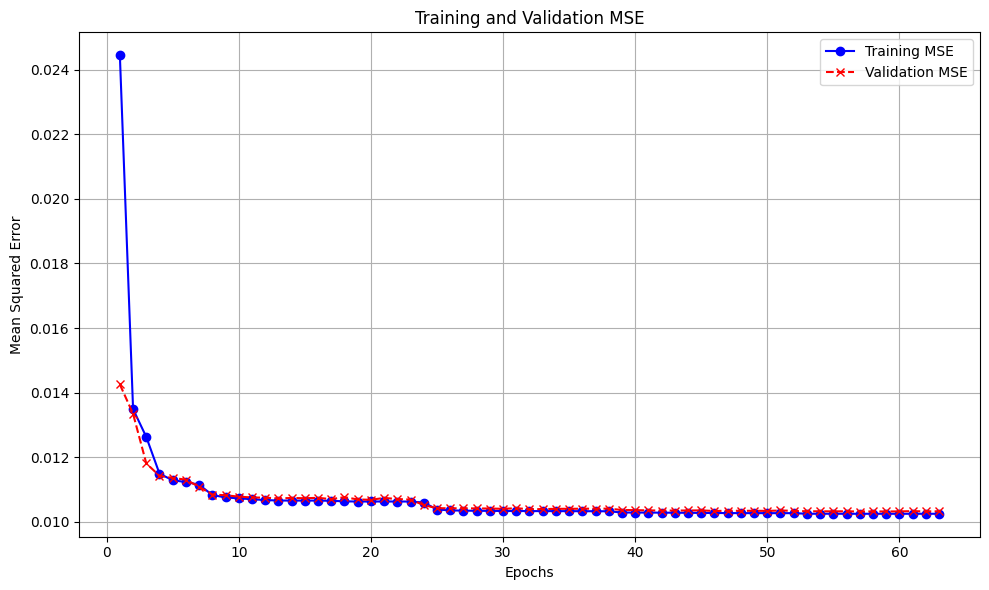

[INFO] Curva MSE salvata in 'output/mse_curve.png'


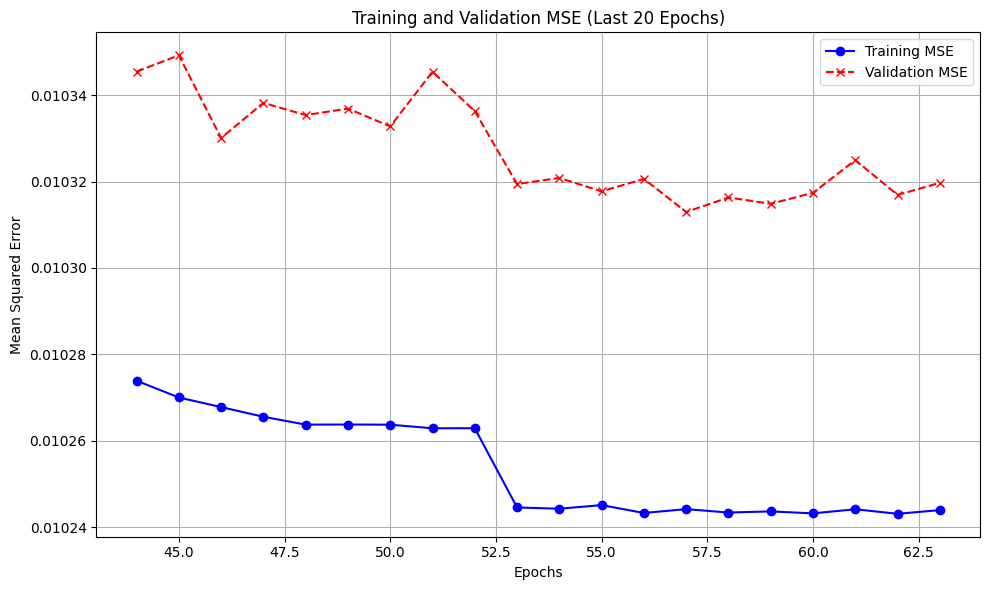

[INFO] Curva MSE (zoom) salvata in 'output/mse_curve_zoomed2.png'


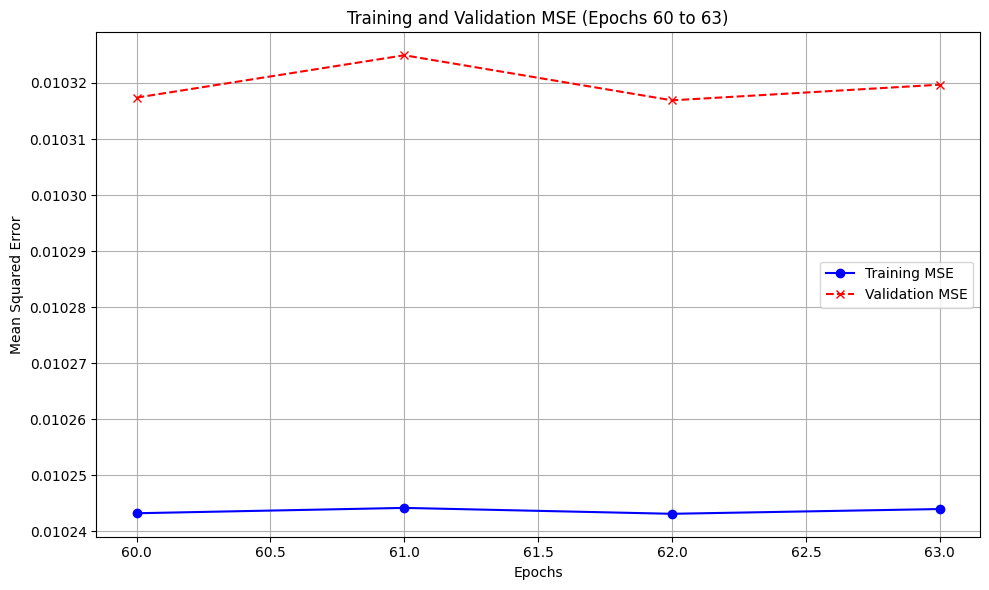

[INFO] Curva MSE (zoom) salvata in 'output/mse_curve_zoomed.png'


In [ ]:
visualize_MSE(train_mse, val_mse)

###Visualizzazione della loss

[INFO] Grafico della perdita salvato in '/content/drive/MyDrive/Autoencoder/TestTesi/loss_plot.png'


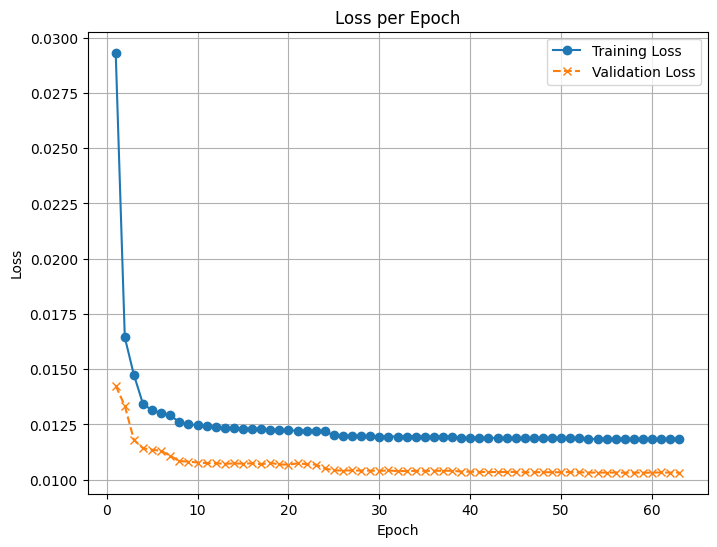

[INFO] Grafico della perdita salvato in '/content/drive/MyDrive/Autoencoder/TestTesi/loss_plot_zoomed2.png'


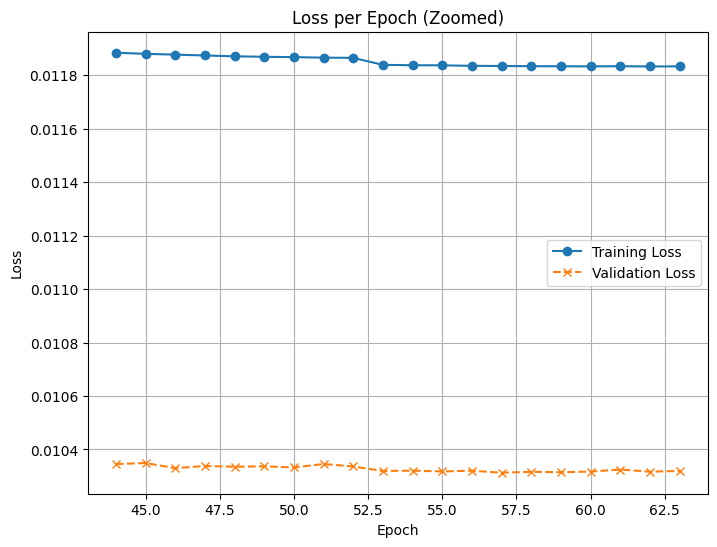

[INFO] Grafico della perdita (zoom) salvato in '/content/drive/MyDrive/Autoencoder/TestTesi/loss_plot_zoomed.png'


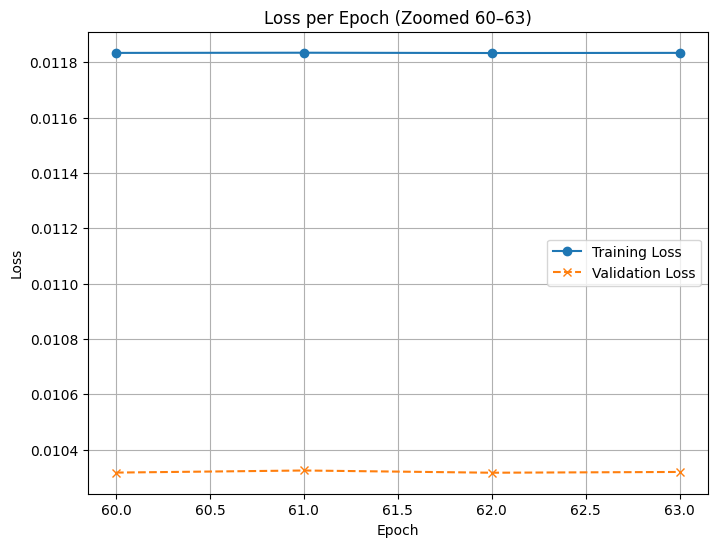

In [ ]:
visualize_training_loss(train_losses, val_losses)

###Salvataggio del modello

In [ ]:
model_path = os.path.join(OUTPUT_DIR, "autoencoder_weights.pth")
torch.save(model.state_dict(), model_path)
print(f"Pesi salvati in: {model_path}")

Pesi salvati in: /content/drive/MyDrive/Autoencoder/TestTesi/autoencoder_weights.pth


###Caricamento del modello

In [ ]:
model_path = os.path.join(OUTPUT_DIR, "autoencoder_weights.pth")
save_path = os.path.join(OUTPUT_DIR, "reconstructed_tensor.csv")
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

###Valutazione generale del modello

In [ ]:
# Valutazione del modello
val_tensor = get_tensor_from_loader(val_loader)
original, reconstructed = evaluate_model(model, val_tensor, statistics)


📊 MSE (Mean Squared Error):      0.010319
📊 MAE (Mean Absolute Error):     0.041036
📊 R² Score (Explained Variance): 0.594163


###Anomaly detection

In [ ]:
# Anomaly detection
reconstruction_errors, anomalies = detect_anomalies(original, reconstructed, output_path="ricostruzione_con_anomalie.csv")


[🔍 ANOMALY DETECTION]
➡️  Soglia: 0.049182
🚨 Anomalie trovate: 1814 su 66870 (2.71%)
[💾] File salvato: '/content/drive/MyDrive/Autoencoder/TestTesi/ricostruzione_con_anomalie.csv'


###Visualizzazione dell'errore di ricostruzione

[INFO] Grafico degli errori di ricostruzione salvato in '/content/drive/MyDrive/Autoencoder/TestTesi/reconstruction_errors.png'


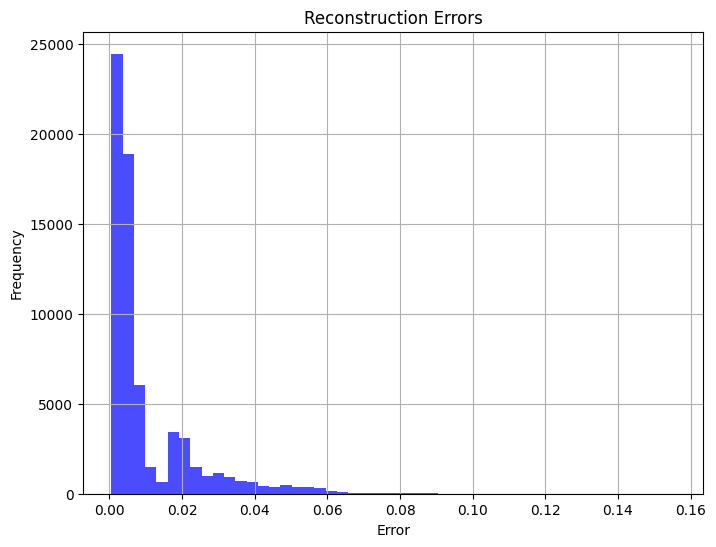

In [ ]:
# Visualizza gli errori di ricostruzione
visualize_reconstruction_errors(reconstruction_errors)

###Analisi delle anomalie

In [ ]:
df_anomalies = get_all_anomalies_as_polars(original, reconstructed, anomalies)


print(df_anomalies.head())
print(df_anomalies.columns)

[💾] File salvato: /content/drive/MyDrive/Autoencoder/TestTesi/dettaglio_anomalie.csv
shape: (5, 123)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ orig_esti ┆ orig_esti ┆ orig_star ┆ orig_star ┆ … ┆ recon_ser ┆ recon_bus ┆ recon_ist ┆ reconstr │
│ mated_dur ┆ mated_dis ┆ t_hour    ┆ t_minute  ┆   ┆ vices_end ┆ inesses_e ┆ itutions_ ┆ uction_e │
│ ation_in_ ┆ tance_in_ ┆ ---       ┆ ---       ┆   ┆ ---       ┆ nd        ┆ and_educa ┆ rror     │
│ mn        ┆ met…      ┆ f32       ┆ f32       ┆   ┆ f32       ┆ ---       ┆ tio…      ┆ ---      │
│ ---       ┆ ---       ┆           ┆           ┆   ┆           ┆ f32       ┆ ---       ┆ f32      │
│ f32       ┆ f32       ┆           ┆           ┆   ┆           ┆           ┆ f32       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0.000699  ┆ 0.580994  ┆ 0.956522  ┆ 0.542373  ┆ … ┆ 0.820764  ┆ 0.829364  ┆ 0.826903  ┆ 0

🔍 Top 10 feature più responsabili delle anomalie:
                             feature  mean_absolute_error
8               eat_and_drinks_start             0.441516
41                    services_start             0.431922
6                   businesses_start             0.428486
7                 eat_and_drinks_end             0.426903
43              sport_and_care_start             0.425464
5                     businesses_end             0.411856
27  istitutions_and_educations_start             0.411555
40                      services_end             0.409655
26    istitutions_and_educations_end             0.402438
42                sport_and_care_end             0.402318


<ipython-input-28-6ae40dfc10da>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contrib_df_anomalies.head(15),


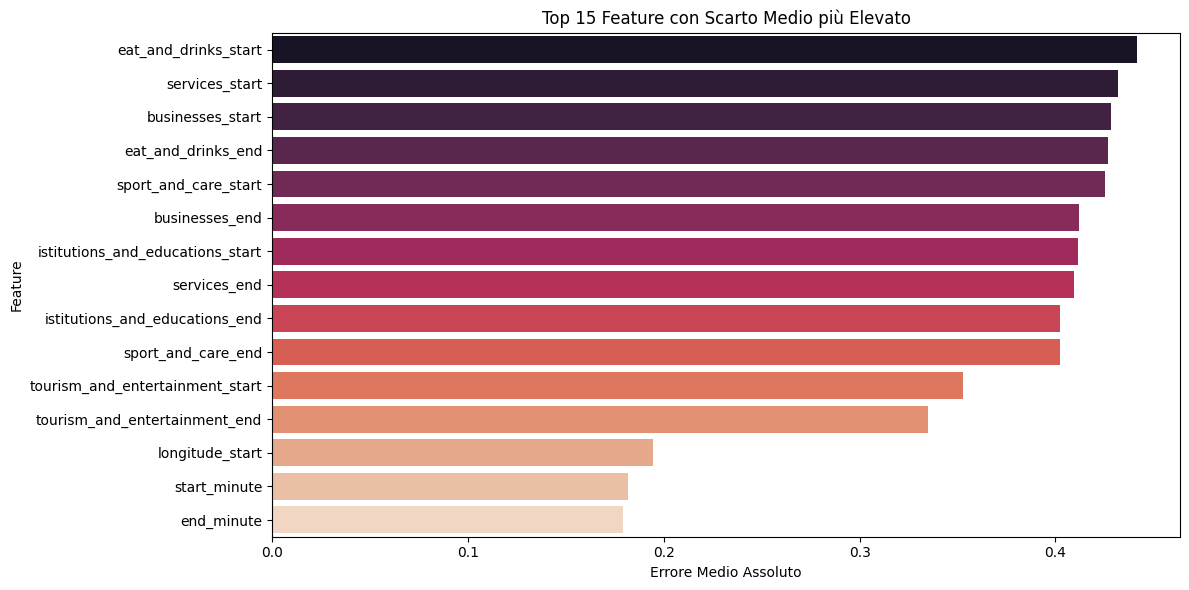


📊 Statistiche sull'errore di ricostruzione:
count    1814.000000
mean        0.059973
std         0.011823
min         0.049188
25%         0.052565
50%         0.056414
75%         0.062385
max         0.155696
Name: reconstruction_error, dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


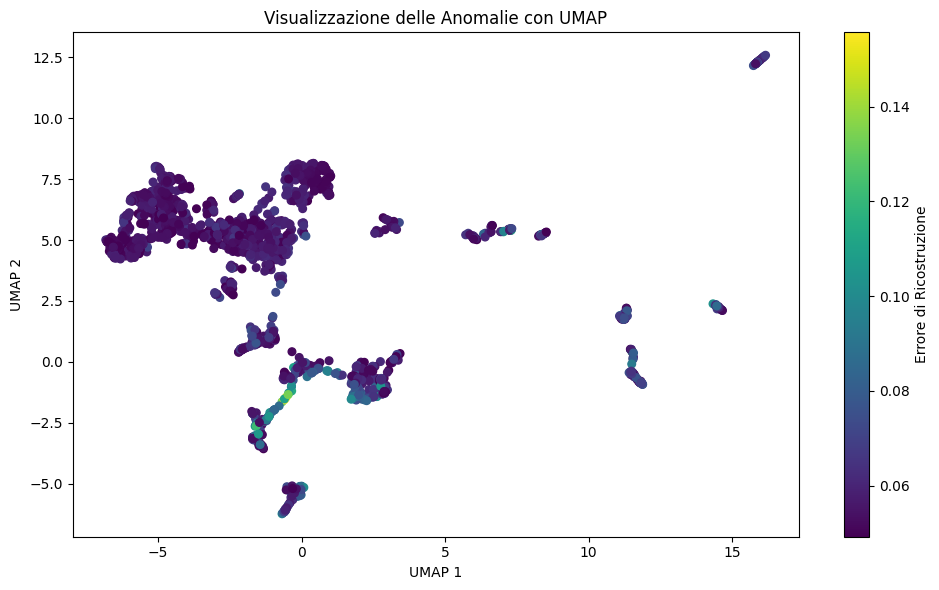

In [ ]:
analyze_anomalies(df_anomalies)

###Salvataggio delle anomalie

In [ ]:
stampa_e_salva_righe(df_anomalies)


 Riga 1
                       Feature |     Originale |   Ricostruita
---------------------------------------------------------------


ColumnNotFoundError: "orig_0" not found

#Test clustering

In [ ]:
# Estrazione embedding
encoded_data = save_embedding(model, data_tensor, output_path="embedding.csv")

[INFO] Embedding salvato in '/content/drive/MyDrive/Autoencoder/Test2/embedding.csv'


##PCA SCALED

In [ ]:
n_clusters = 10
# Clustering sugli embedding
kmeans_labels_PCA_scaled = perform_clustering(encoded_data_scaled, n_clusters, statistics, output_path="dati_con_cluster.csv")


[INFO] Applicando clustering sugli embedding (n_clusters=10)...
[INFO] Silhouette Score         : 0.1574
[INFO] Inertia (Elbow)         : 2069546.88
[INFO] Davies-Bouldin Score    : 1.9358
[INFO] Calinski-Harabasz Index : 34870.61
[💾] File salvato con i cluster: '/content/drive/MyDrive/Autoencoder/Test1/dati_con_cluster.csv'


[INFO] Embedding scatter plot saved in '/content/drive/MyDrive/Autoencoder/Test1/embedding_scatter.png'


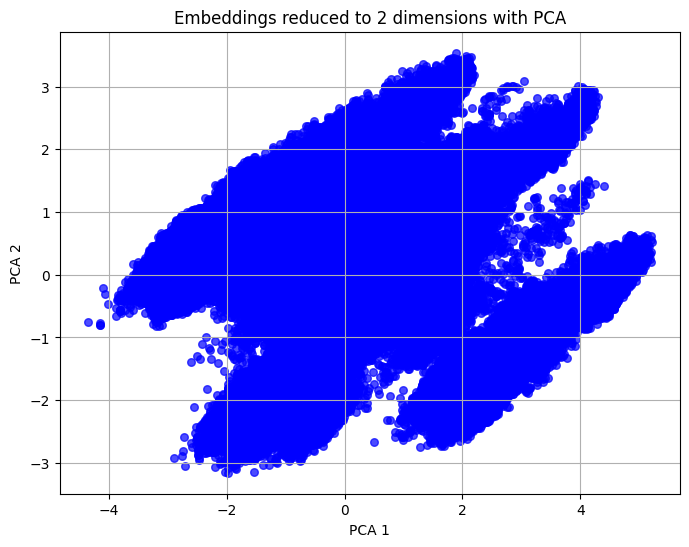

[INFO] Clustered embedding plot saved in '/content/drive/MyDrive/Autoencoder/Test1/embedding_clusters.png'


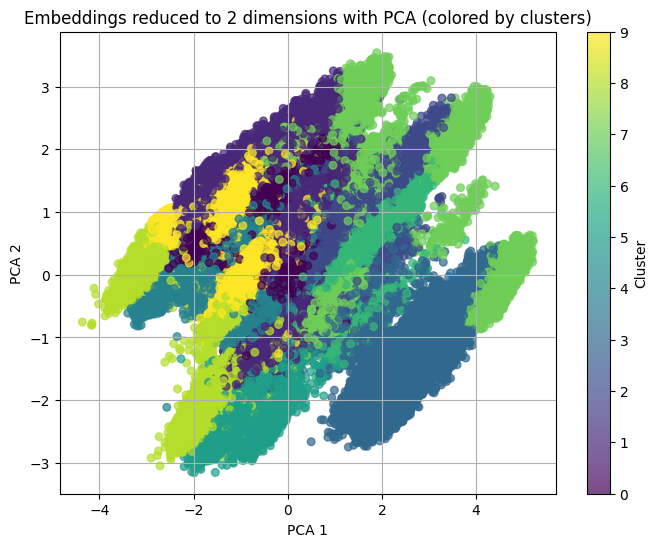

[INFO] PCA explained variance plot saved in '/content/drive/MyDrive/Autoencoder/Test1/pca_explained_variance.png'


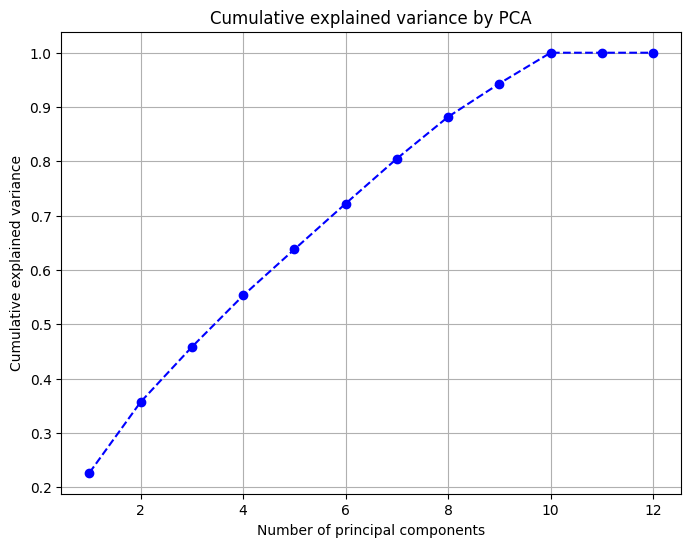

In [ ]:
# Analizza gli embedding e genera i grafici
analyze_embeddings(encoded_data_scaled, kmeans_labels=kmeans_labels_PCA_scaled)

[📊] Cluster plot salvato in: /content/drive/MyDrive/Autoencoder/Test1/clusters_k10.png
[📝] Metriche salvate in: /content/drive/MyDrive/Autoencoder/Test1/metrics_k10.txt
[💾] Coordinate PCA salvate in: /content/drive/MyDrive/Autoencoder/Test1/pca_data_k10.csv


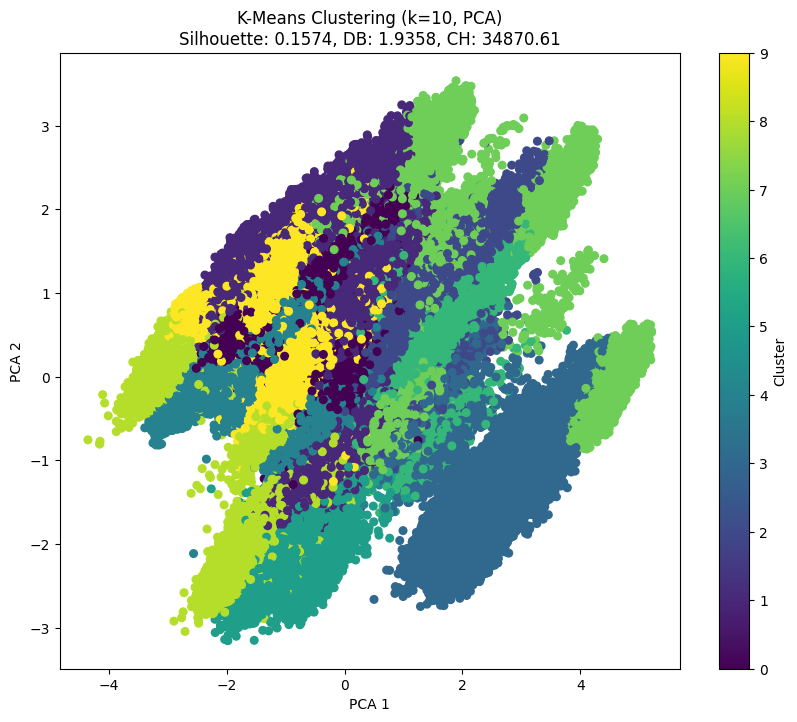

(np.float32(0.15744585), np.float64(1.9357712574827233), np.float32(34870.61))

In [ ]:
# Visualizzazione dei cluster
visualize_clusters(encoded_data_scaled, kmeans_labels_PCA_scaled)

In [ ]:
# Carica il tensore originale da CSV
df_tensor = pl.read_csv(CSV_PATH, separator=";")

# Aggiungi la colonna "cluster" con le etichette K-Means
df_tensor = df_tensor.with_columns([
    pl.Series(name="kmeans_labels_PCA_scaled", values=kmeans_labels_PCA_scaled)
])

# Salva il DataFrame aggiornato
df_tensor.write_csv(final_path, separator=";")

print(f"[SALVA] File salvato con cluster in: {final_path}")

[💾] File salvato con cluster in: /content/drive/MyDrive/Tensore/tensore_5_1_with_clusters.csv


##PCA

In [ ]:
n_clusters = 10
# Clustering sugli embedding
kmeans_labels_PCA = perform_clustering(encoded_data, n_clusters, statistics, output_path="dati_con_cluster.csv")


[INFO] Applicando clustering sugli embedding (n_clusters=10)...
[INFO] Silhouette Score         : 0.4205
[INFO] Inertia (Elbow)         : 336324.41
[INFO] Davies-Bouldin Score    : 1.1213
[INFO] Calinski-Harabasz Index : 143775.20
[💾] File salvato con i cluster: '/content/drive/MyDrive/Autoencoder/Test1/dati_con_cluster.csv'


[INFO] Embedding scatter plot saved in '/content/drive/MyDrive/Autoencoder/Test1/embedding_scatter.png'


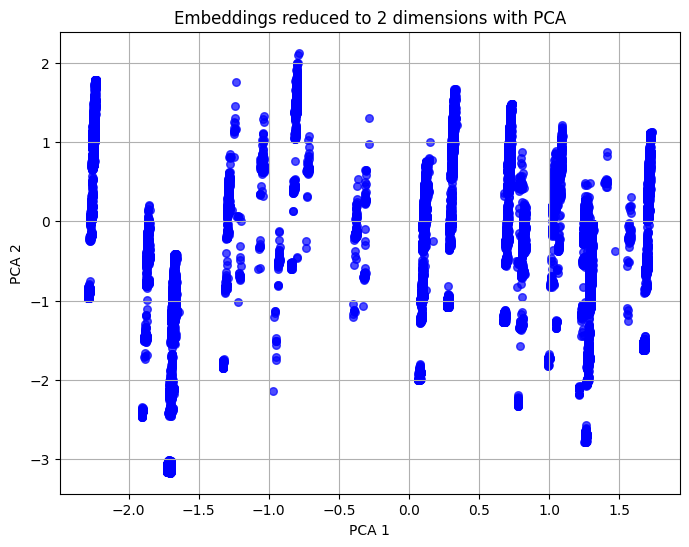

[INFO] Clustered embedding plot saved in '/content/drive/MyDrive/Autoencoder/Test1/embedding_clusters.png'


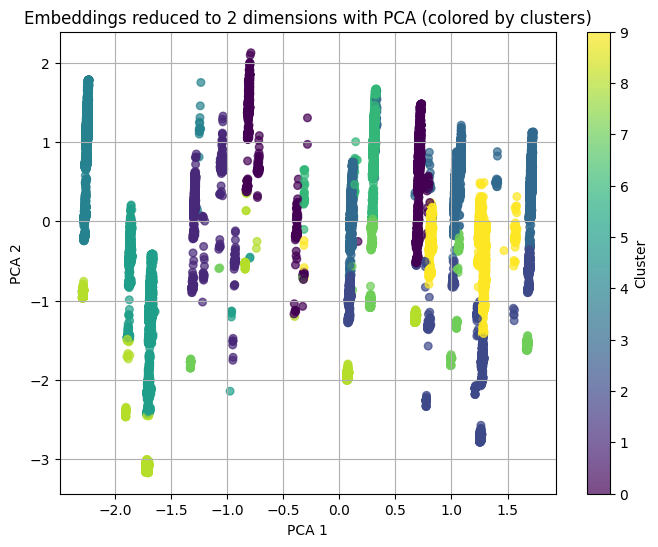

[INFO] PCA explained variance plot saved in '/content/drive/MyDrive/Autoencoder/Test1/pca_explained_variance.png'


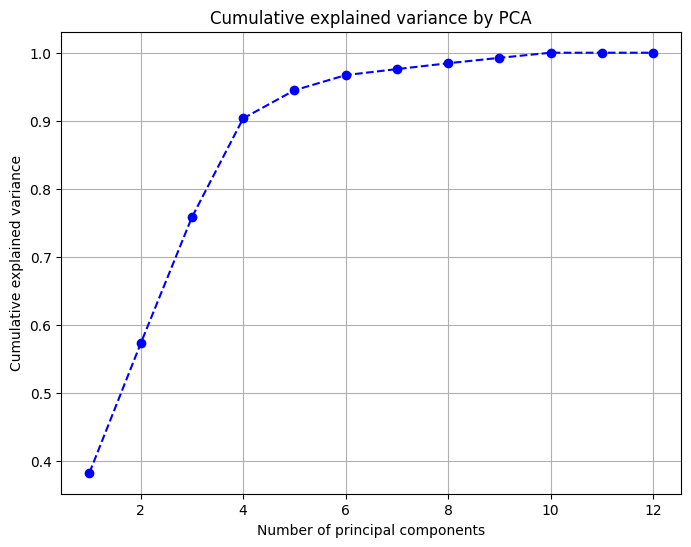

In [ ]:
# Analizza gli embedding e genera i grafici
analyze_embeddings(encoded_data, kmeans_labels=kmeans_labels_PCA)

[📊] Cluster plot salvato in: /content/drive/MyDrive/Autoencoder/Test1/clusters_k10.png
[📝] Metriche salvate in: /content/drive/MyDrive/Autoencoder/Test1/metrics_k10.txt
[💾] Coordinate PCA salvate in: /content/drive/MyDrive/Autoencoder/Test1/pca_data_k10.csv


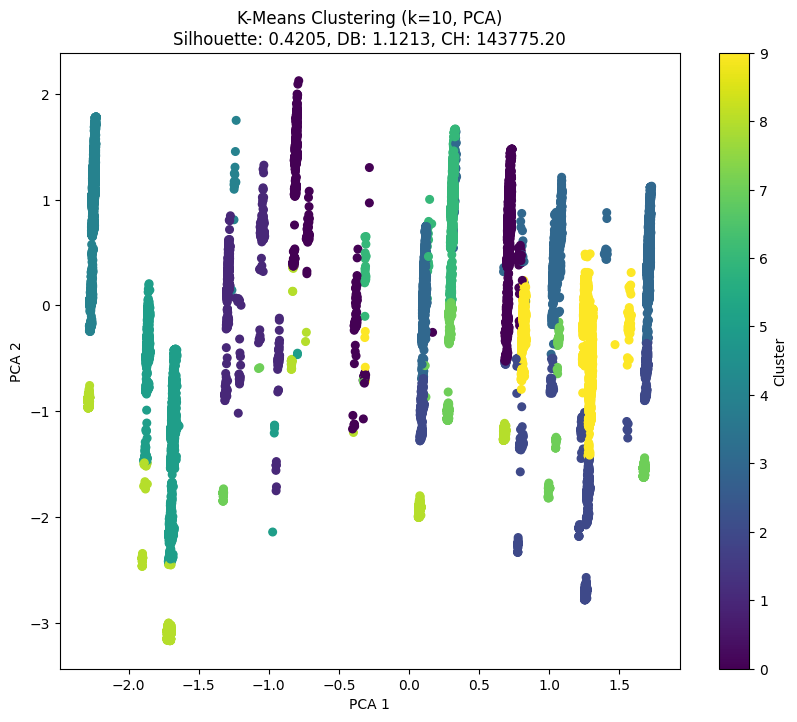

(np.float32(0.42045084), np.float64(1.1213265817516613), np.float32(143775.2))

In [ ]:
# Visualizzazione dei cluster
visualize_clusters(encoded_data, kmeans_labels_PCA)

In [ ]:
# Carica il tensore originale da CSV
df_tensor = pl.read_csv(final_path, separator=";")

# Aggiungi la colonna "cluster" con le etichette K-Means
df_tensor = df_tensor.with_columns([
    pl.Series(name="kmeans_labels_PCA", values=kmeans_labels_PCA)
])

# Salva il DataFrame aggiornato
df_tensor.write_csv(final_path, separator=";")

print(f"[SALVA] File salvato con cluster in: {final_path}")

[💾] File salvato con cluster in: /content/drive/MyDrive/Tensore/tensore_5_1_with_clusters.csv


##UMAP SCALED


[INFO] Clustering su embeddings con K-Means (n_clusters=23) e UMAP...
[INFO] Silhouette Score         : 0.1806
[INFO] Davies-Bouldin Score    : 1.7582
[INFO] Calinski-Harabasz Index : 24505.19
[💾] Etichette cluster salvate in: /content/drive/MyDrive/Autoencoder/Test1/cluster_labels_k23.csv


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[💾] Coordinate UMAP salvate in: /content/drive/MyDrive/Autoencoder/Test1/umap_data_k23.csv
[📊] Plot salvato in: /content/drive/MyDrive/Autoencoder/Test1/umap_clusters_k23.png


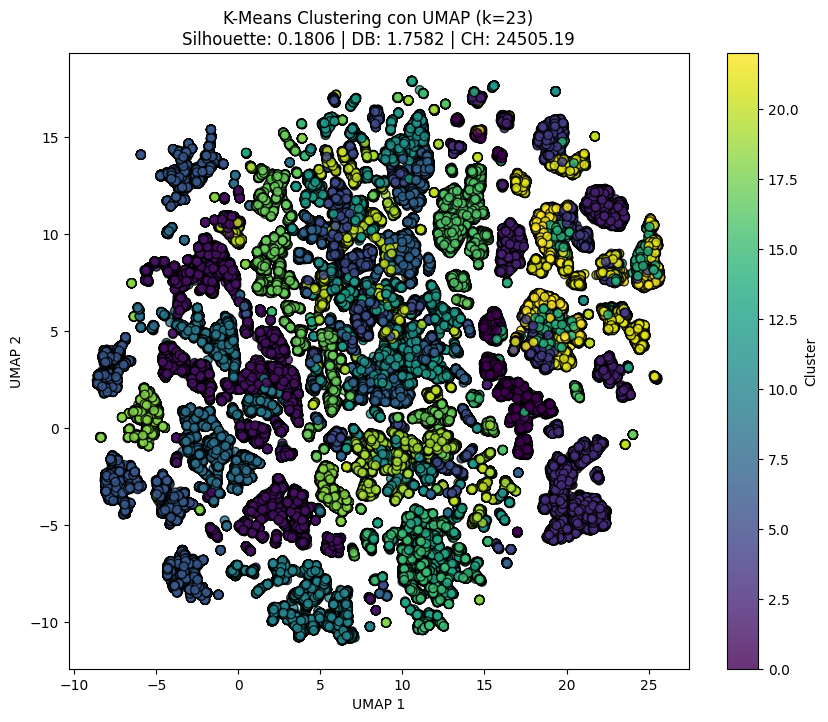

In [ ]:
n_clusters = 23
kmeans_labels_UMAP_SCALED, silhouette_UMAP_SCALED, db_score_UMAP_SCALED, ch_score_UMAP_SCALED = cluster_and_visualize_umap(encoded_data_scaled, n_clusters, statistics)

In [ ]:
# Carica il tensore originale da CSV
df_tensor = pl.read_csv(final_path)

# Aggiungi la colonna "cluster" con le etichette K-Means
df_tensor = df_tensor.with_columns([
    pl.Series(name="kmeans_labels_UMAP_SCALED", values=kmeans_labels_UMAP_SCALED)
])

# Salva il DataFrame aggiornato
df_tensor.write_csv(final_path, separator=";")

print(f"[SALVA] File salvato con cluster in: {final_path}")

NameError: name 'kmeans_labels_UMAP_SCALED' is not defined

##UMAP


[INFO] Clustering su embeddings con K-Means (n_clusters=12) e UMAP...
[INFO] Silhouette Score         : 0.3932
[INFO] Davies-Bouldin Score    : 0.9880
[INFO] Calinski-Harabasz Index : 152356.44
[💾] Etichette cluster salvate in: /content/drive/MyDrive/Autoencoder/Test2/cluster_labels_k12.csv


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[💾] Coordinate UMAP salvate in: /content/drive/MyDrive/Autoencoder/Test2/umap_data_k12.csv
[📊] Plot salvato in: /content/drive/MyDrive/Autoencoder/Test2/umap_clusters_k12_2D.png


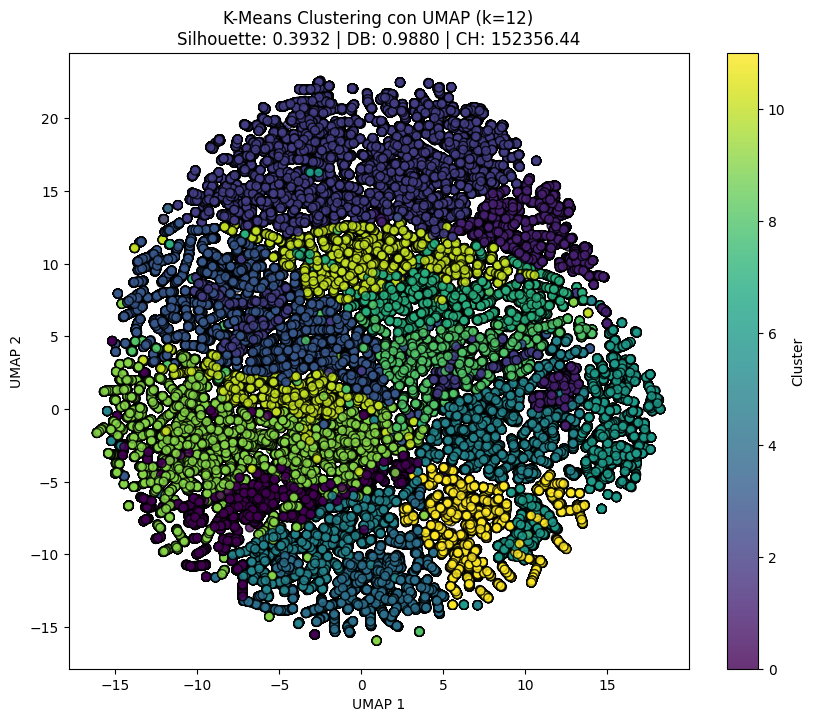

In [ ]:
n_clusters = 12
dimension = 2
kmeans_labels_UMAP2, silhouette_UMAP, db_score_UMAP, ch_score_UMAP = cluster_and_visualize_umap(encoded_data, n_clusters, statistics, dimension)

In [ ]:
# Aggiungi la colonna "cluster" con le etichette K-Means
df = pl.read_csv(final_path, separator=";")

df_tensor = df.with_columns([
    pl.Series(name="kmeans_labels_UMAP2D", values=kmeans_labels_UMAP2)
])

# Salva il DataFrame aggiornato
df_tensor.write_csv(final_path, separator=";")

print(f"[SALVA] File salvato con cluster in: {final_path}")

df = pl.read_csv(final_path, separator=";")

# Nome della colonna da controllare
target_column = "kmeans_labels_UMAP2D"

# Controlla se la colonna esiste
if target_column in df.columns:
    print(f"[OK] La colonna '{target_column}' è presente nel DataFrame.")
else:
    print(f"[ERROR] La colonna '{target_column}' NON è presente nel DataFrame.")

[💾] File salvato con cluster in: /content/drive/MyDrive/Tensore/tensore_5_1_with_clusters_2-1.csv
[✅] La colonna 'kmeans_labels_UMAP2D' è presente nel DataFrame.



[INFO] Clustering su embeddings con K-Means (n_clusters=12) e UMAP...
[INFO] Silhouette Score         : 0.3932
[INFO] Davies-Bouldin Score    : 0.9880
[INFO] Calinski-Harabasz Index : 152356.44
[💾] Etichette cluster salvate in: /content/drive/MyDrive/Autoencoder/Test2/cluster_labels_k12.csv


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[💾] Coordinate UMAP salvate in: /content/drive/MyDrive/Autoencoder/Test2/umap_data_k12.csv
[📊] Plot salvato in: /content/drive/MyDrive/Autoencoder/Test2/umap_clusters_k12_3D.png


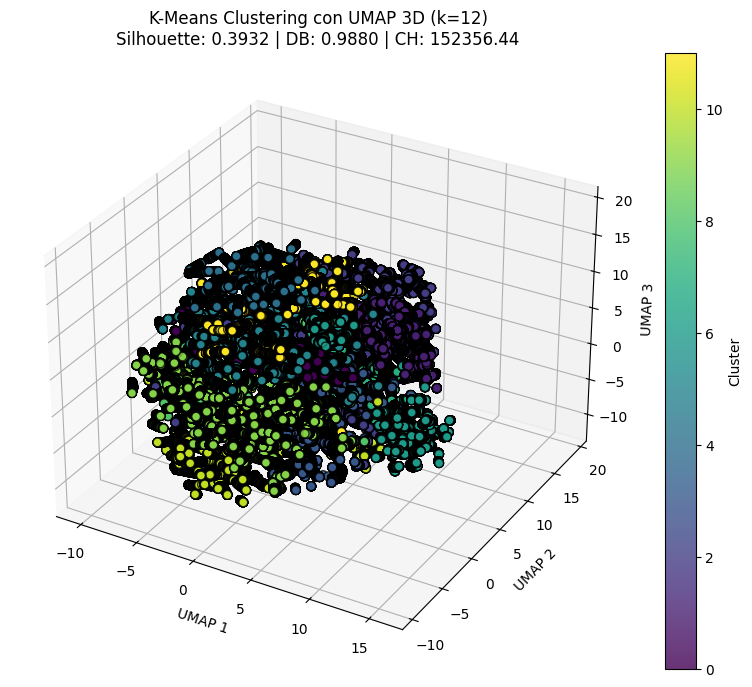

In [ ]:
n_clusters = 12
dimension = 3
kmeans_labels_UMAP3, silhouette_UMAP, db_score_UMAP, ch_score_UMAP = cluster_and_visualize_umap(encoded_data, n_clusters, statistics, dimension)

In [ ]:
# Aggiungi la colonna "cluster" con le etichette K-Means

df_tensor = df.with_columns([
    pl.Series(name="kmeans_labels_UMAP3D", values=kmeans_labels_UMAP3)
])

# Salva il DataFrame aggiornato
df_tensor.write_csv(final_path, separator=";")

print(f"[SALVA] File salvato con cluster in: {final_path}")

df = pl.read_csv(final_path, separator=";")

# Nome della colonna da controllare
target_column = "kmeans_labels_UMAP2D"

# Controlla se la colonna esiste
if target_column in df.columns:
    print(f"[OK] La colonna '{target_column}' è presente nel DataFrame.")
else:
    print(f"[ERROR] La colonna '{target_column}' NON è presente nel DataFrame.")

[💾] File salvato con cluster in: /content/drive/MyDrive/Tensore/tensore_5_1_with_clusters_2-1.csv
[✅] La colonna 'kmeans_labels_UMAP2D' è presente nel DataFrame.


##TSNE SCALED

In [ ]:
n_clusters = 23
kmeans_labels_TSNE_SCALED, silhouette_TSE_SCALED, db_score_TSE_SCALED, ch_score_TSE_SCALED = cluster_and_visualize_tsne(encoded_data_scaled, n_clusters, statistics)


[INFO] Clustering su embeddings con K-Means (n_clusters=23) e t-SNE...
[INFO] Silhouette Score         : 0.1806
[INFO] Davies-Bouldin Score    : 1.7582
[INFO] Calinski-Harabasz Index : 24505.19
[💾] Etichette cluster salvate in: /content/drive/MyDrive/Autoencoder/Test1/cluster_labels_k23.csv
[INFO] Esecuzione t-SNE (potrebbe richiedere tempo)...


In [ ]:
# Carica il tensore originale da CSV
df_tensor = pl.read_csv(final_path, separator=";")

# Aggiungi la colonna "cluster" con le etichette K-Means
df_tensor = df_tensor.with_columns([
    pl.Series(name="kmeans_labels_TSNE_SCALED", values=kmeans_labels_TSNE_SCALED)
])

# Salva il DataFrame aggiornato
df_tensor.write_csv(final_path, separator=";")

print(f"[SALVA] File salvato con cluster in: {final_path}")

##TSNE


[INFO] Clustering su embeddings con K-Means (n_clusters=12) e t-SNE...
[INFO] Silhouette Score         : 0.4449
[INFO] Davies-Bouldin Score    : 0.9986
[INFO] Calinski-Harabasz Index : 152970.72
[💾] Etichette cluster salvate in: /content/drive/MyDrive/Autoencoder/Test1/cluster_labels_k12.csv
[INFO] Esecuzione t-SNE (potrebbe richiedere tempo)...
[💾] Coordinate t-SNE salvate in: /content/drive/MyDrive/Autoencoder/Test1/tsne_data_k12.csv
[📊] Plot salvato in: /content/drive/MyDrive/Autoencoder/Test1/tsne_clusters_k12.png


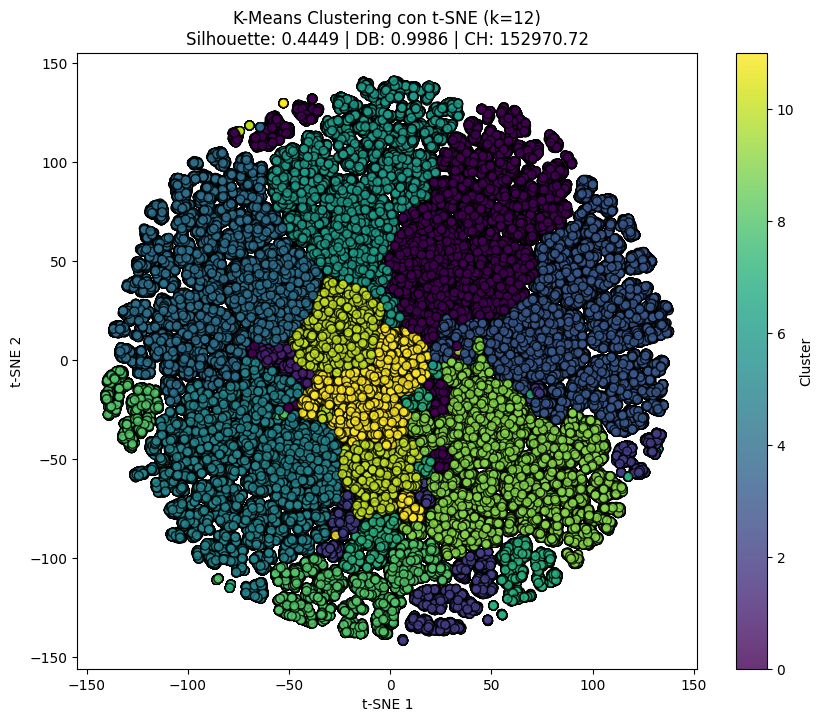

In [ ]:
n_clusters = 12
kmeans_labels_TSNE, silhouette_TSNE, db_score_TSNE, ch_score_TSNE = cluster_and_visualize_tsne(encoded_data, n_clusters, statistics)

In [ ]:
# Carica il tensore originale da CSV
df_tensor = pl.read_csv(final_path, separator=";")

# Aggiungi la colonna "cluster" con le etichette K-Means
df_tensor = df_tensor.with_columns([
    pl.Series(name="kmeans_labels_TSNE", values=kmeans_labels_TSNE)
])

# Salva il DataFrame aggiornato
df_tensor.write_csv(final_path, separator=";")

print(f"[SALVA] File salvato con cluster in: {final_path}")

[💾] File salvato con cluster in: /content/drive/MyDrive/Tensore/tensore_5_1_with_clusters.csv


###Save statistics

In [ ]:
# Salvataggio dei risultati del clustering
save_statistics(statistics, ase_train, ase_val,
                    n_epochs, batch_size, learning_rate,
                    hidden_1, hidden_2, bottleneck_size,
                    activation_fn)

ValueError: La lista 'statistics' ha un formato non valido.

#Ricerca per trovare la configurazione migliore

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from itertools import product
import csv
import os

def grid_search_autoencoder_full(input_dim, dataset, n_epochs=3, output_csv="grid_search_results.csv"):
    # Iperparametri da testare
    batch_sizes = [64, 128, 256]
    learning_rates = [1e-2, 1e-3, 1e-4]
    hidden_1_values = [24, 32, 48] #[64, 128, 256]
    hidden_2_values = [16, 24, 32] #[32, 64, 128]
    bottleneck_sizes = [4, 8, 12] # [8, 16, 32]
    activation_fns = [nn.ReLU, nn.Tanh, nn.LeakyReLU]
    optimizers_dict = {
        "Adam": torch.optim.Adam,
        "SGD": torch.optim.SGD,
        "AdamW": torch.optim.AdamW,
        "RMSprop": torch.optim.RMSprop,
        "Adagrad": torch.optim.Adagrad,
    }

    # evitare ingradimento

    results = []

    for batch_size in batch_sizes:
        data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

        for lr in learning_rates:
            for h1 in hidden_1_values:
                for h2 in hidden_2_values:
                    for bneck in bottleneck_sizes:
                        for act_fn in activation_fns:
                            for opt_name, opt_class in optimizers_dict.items():

                                # Settaggio delle variabili globali
                                global hidden_1, hidden_2, bottleneck_size, activation_fn
                                hidden_1 = h1
                                hidden_2 = h2
                                bottleneck_size = bneck
                                activation_fn = act_fn

                                # Condizione per saltare alla prossima iterazione
                                if h2 >= h1:
                                    print(f"[INFO] Saltata configurazione: hidden_1 >= hodden_2 o hidden_2 >= bottleneck_size")
                                    results.append({
                                        "batch_size": batch_size,
                                        "learning_rate": lr,
                                        "hidden_1": h1,
                                        "hidden_2": h2,
                                        "bottleneck_size": bneck,
                                        "activation_fn": act_fn.__name__,
                                        "optimizer": opt_name,
                                        "final_loss": 999999999.9,
                                        "mse": 999999999.9,
                                        "mae": 999999999.9,
                                        "r2": 999999999.9
                                    })
                                    continue

                                # Inizializza modello
                                model = Autoencoder(input_dim)
                                optimizer = opt_class(model.parameters(), lr=lr, weight_decay=1e-5)  # Aggiunto weight_decay per L2
                                criterion = nn.MSELoss()

                                print(f"[INFO] Training AE | bs={batch_size}, lr={lr}, h1={h1}, h2={h2}, bottleneck={bneck}, act={act_fn.__name__}, opt={opt_name}")

                                try:
                                    # Addestra il modello
                                    losses = train_autoencoder(model, data_loader, n_epochs, criterion, optimizer, output_path="temp_loss.csv")
                                    final_loss = losses[-1]

                                    # Valuta il modello
                                    original, reconstructed = evaluate_model(model, data_tensor)
                                    mse = mean_squared_error(original, reconstructed)
                                    mae = mean_absolute_error(original, reconstructed)
                                    r2 = r2_score(original, reconstructed)

                                except Exception as e:
                                    print(f"[ERROR] Fallito training: {e}")
                                    final_loss = float("inf")
                                    mse, mae, r2 = float("inf"), float("inf"), float("-inf")

                                # Salva risultato
                                results.append({
                                    "batch_size": batch_size,
                                    "learning_rate": lr,
                                    "hidden_1": h1,
                                    "hidden_2": h2,
                                    "bottleneck_size": bneck,
                                    "activation_fn": act_fn.__name__,
                                    "optimizer": opt_name,
                                    "final_loss": final_loss,
                                    "mse": mse,
                                    "mae": mae,
                                    "r2": r2
                                })
    # Salvataggio su CSV
    output_csv_path = os.path.join(OUTPUT_DIR, "risultati_grid_search2.csv")  # Specifica un file all'interno della directory
    with open(output_csv_path, "w", newline="") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
        writer.writeheader()
        for row in results:
            writer.writerow(row)

    print(f"\n[INFO] Grid search completata. Risultati salvati in '{output_csv_path}'")
    return results

In [ ]:
import pandas as pd

# 1. Carica e normalizza i dati
df, data_tensor, scaler = load_and_normalize_data(CSV_PATH)

# 2. Crea dataset per il DataLoader
dataset = TensorDataset(data_tensor)

# 3. Lancia la grid search
results = grid_search_autoencoder_full(
    input_dim=data_tensor.shape[1],  # 62
    dataset=dataset,
    n_epochs=3,
    output_csv="risultati_grid_search2.csv"
)

# Leggi i risultati dal file CSV
df_results = pd.read_csv(os.path.join(OUTPUT_DIR, "risultati_grid_search2.csv"))

# Usa il nome corretto della colonna per ordinare i risultati
df_results_sorted = df_results.sort_values(by="final_loss")  # Cambiato da "loss" a "final_loss"

# Estrai la configurazione migliore
best_config = df_results_sorted.iloc[0]
print("Configurazione migliore trovata:")
print(best_config)

# controllare loss e val loss, segnare epoche

[INFO] Dataset caricato: (334353, 62)
[INFO] Training AE | bs=32, lr=0.01, h1=64, h2=32, bottleneck=8, act=ReLU, opt=Adam
[INFO] Inizio training...
Epoch 1/3 - Loss: 0.014291
Epoch 2/3 - Loss: 0.012453
Epoch 3/3 - Loss: 0.013965
[INFO] Perdita per epoca salvata in '/content/drive/MyDrive/Autoencoder/1/temp_loss.csv'
[INFO] Training AE | bs=32, lr=0.01, h1=64, h2=32, bottleneck=8, act=ReLU, opt=SGD
[INFO] Inizio training...
Epoch 1/3 - Loss: 0.089878
Epoch 2/3 - Loss: 0.073541
Epoch 3/3 - Loss: 0.062400
[INFO] Perdita per epoca salvata in '/content/drive/MyDrive/Autoencoder/1/temp_loss.csv'
[INFO] Training AE | bs=32, lr=0.01, h1=64, h2=32, bottleneck=8, act=ReLU, opt=AdamW
[INFO] Inizio training...
Epoch 1/3 - Loss: 0.016834
Epoch 2/3 - Loss: 0.012847
Epoch 3/3 - Loss: 0.012123
[INFO] Perdita per epoca salvata in '/content/drive/MyDrive/Autoencoder/1/temp_loss.csv'
[INFO] Training AE | bs=32, lr=0.01, h1=64, h2=32, bottleneck=8, act=Tanh, opt=Adam
[INFO] Inizio training...
Epoch 1/3 - 

In [ ]:
print(data_tensor.shape[1])

#Studio dei cluster

In [ ]:
df_tensore = pl.read_csv(final_path, separator=";")

# Mostra tutte le colonne e imposta una larghezza ampia per evitare troncamenti
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 2000)
print(df_tensore.shape)
print(df_tensore.columns)

(334353, 64)
['id', 'estimated_duration_in_mn', 'estimated_distance_in_meter', 'start_hour', 'start_minute', 'start_month', 'start_day', 'end_hour', 'end_minute', 'end_month', 'end_day', 'weekday_num_start', 'weekday_num_end', 'start_monday', 'start_tuesday', 'start_wednesday', 'start_thursday', 'start_friday', 'start_saturday', 'start_sunday', 'end_monday', 'end_tuesday', 'end_wednesday', 'end_thursday', 'end_friday', 'end_saturday', 'end_sunday', 'start_weekend', 'end_weekend', 'start_public_holiday', 'end_public_holiday', 'holiday_start', 'holiday_end', 'actual_duration_mn', 'Car', 'Bike', 'Motorscooter', 'Scooter', 'latitude_start', 'longitude_start', 'latitude_end', 'longitude_end', 'num_ferrovie_start', 'num_superficie_start', 'num_metro_start', 'num_POI_start', 'tourism_and_entertainment_start', 'eat_and_drinks_start', 'sport_and_care_start', 'services_start', 'businesses_start', 'istitutions_and_educations_start', 'num_ferrovie_end', 'num_superficie_end', 'num_metro_end', 'num_

In [ ]:
print(df_tensore.to_pandas().groupby("kmeans_labels_PCA").describe())

In [ ]:
print(df_tensore.to_pandas().groupby("kmeans_labels_PCA_scaled").describe())

                               id                                                                                  estimated_duration_in_mn                                                      estimated_distance_in_meter                                                                     start_hour                                                   start_minute                                                    start_month                                                start_day                                                   end_hour                                                  end_minute                                                    end_month                                                 end_day                                                   weekday_num_start                                              weekday_num_end                                              start_monday                                              start_tuesday                                    

In [ ]:
grouped = df_tensore.to_pandas().groupby("kmeans_labels_UMAP2D")

for label, group in grouped:
    print(f"Descrizione per il cluster {label}:\n")
    print(group.describe())
    print("\n" + "-" * 80 + "\n")

NameError: name 'df_tensore' is not defined

In [ ]:
print(df_tensore.shape)
grouped = df_tensore.to_pandas().groupby("kmeans_labels_UMAP3D")

for label, group in grouped:
    print(f"Descrizione per il cluster {label}:\n")
    print(group.describe())
    print("\n" + "-" * 80 + "\n")

(334353, 64)
Descrizione per il cluster 0:

                  id  estimated_duration_in_mn  estimated_distance_in_meter    start_hour  start_minute   start_month     start_day      end_hour    end_minute     end_month       end_day  weekday_num_start  weekday_num_end  start_monday  start_tuesday  start_wednesday  start_thursday  start_friday  start_saturday  start_sunday  end_monday  end_tuesday  end_wednesday  end_thursday    end_friday  end_saturday    end_sunday  start_weekend   end_weekend  start_public_holiday  end_public_holiday  holiday_start   holiday_end  actual_duration_mn      Car     Bike  Motorscooter  Scooter  latitude_start  longitude_start  latitude_end  longitude_end  num_ferrovie_start  num_superficie_start  num_metro_start  num_POI_start  tourism_and_entertainment_start  eat_and_drinks_start  sport_and_care_start  services_start  businesses_start  istitutions_and_educations_start  num_ferrovie_end  num_superficie_end  num_metro_end   num_POI_end  tourism_and_entertai

In [ ]:
print(df_tensore.to_pandas().groupby("kmeans_labels_UMAP_SCALED").describe())

                          kmeans_labels_PCA_scaled                                              kmeans_labels_PCA                                              kmeans_labels_UMAP                                                kmeans_labels_TSNE_SCALED                                         
                                             count      mean       std  min  25%  50%  75%  max             count      mean       std  min  25%  50%  75%  max              count      mean       std  min  25%  50%   75%   max                     count  mean  std   min   25%   50%   75%   max
kmeans_labels_UMAP_scaled                                                                                                                                                                                                                                                                          
0                                          13288.0  1.632526  1.971549  0.0  0.0  0.0  4.0  7.0           13288.0  0.000602 

#Mappa interattiva

Cosa fa:

- Crea una mappa interattiva di Folium, centrata sulla media delle latitudini e longitudini calcolate in precedenza (lat_mean e lon_mean), con uno zoom di livello 13 (che è un livello medio di zoom per una visualizzazione a livello di città).

- La mappa viene inizializzata sulla base del centro geografico del cluster.

Cosa fa:

- Crea un rettangolo sulla mappa, che rappresenta l'area del cluster basata sui percentili di latitudine e longitudine.

- Il rettangolo è colorato di blu e ha un riempimento semitrasparente (fill_opacity=0.2).

- La tooltip (informazione che appare quando si passa sopra il rettangolo con il mouse) mostrerà un testo che indica a quale cluster appartiene quell'area, ad esempio "Cluster 1 Area".

Cosa fa:

- Crea un cluster di marker sulla mappa con la classe MarkerCluster, che permette di raggruppare i marker vicini in un singolo punto per evitare l'affollamento della mappa.

- Per ogni coppia di coordinate di partenza (lat_start, lon_start), viene aggiunto un marker verde (CircleMarker) alla mappa.

- Per ogni coppia di coordinate di arrivo (lat_end, lon_end), viene aggiunto un marker rosso.

- Questi marker rappresentano i punti di inizio e fine dei viaggi nel cluster.

In [ ]:
def plot_cluster_area_colab(df, cluster_label):
    df_cluster = df[df['kmeans_labels_UMAP2D'] == cluster_label]

    lat_start = df_cluster['latitude_start']
    lon_start = df_cluster['longitude_start']
    lat_end = df_cluster['latitude_end']
    lon_end = df_cluster['longitude_end']

    all_lat = pd.concat([lat_start, lat_end])
    all_lon = pd.concat([lon_start, lon_end])

    lat_mean, lon_mean = all_lat.mean(), all_lon.mean()
    lat_min, lat_max = np.percentile(all_lat, [5, 95])
    lon_min, lon_max = np.percentile(all_lon, [5, 95])

    m = folium.Map(location=[lat_mean, lon_mean], zoom_start=13)

    <# bounds = [[lat_min, lon_min], [lat_max, lon_max]]
    # folium.Rectangle(bounds=bounds, color='blue', fill=True, fill_opacity=0.1, tooltip=f'Cluster {cluster_label} Area').add_to(m)

    marker_cluster = MarkerCluster().add_to(m)
    for lat, lon in zip(lat_start, lon_start):
        folium.CircleMarker(location=[lat, lon], radius=2, color='green', fill=True).add_to(marker_cluster)
    for lat, lon in zip(lat_end, lon_end):
        folium.CircleMarker(location=[lat, lon], radius=2, color='red', fill=True).add_to(marker_cluster)

    display(m)


In [ ]:
# cluster da 0 a 11
cluster_label = 0
df_cluster = df_tensore.filter(pl.col("kmeans_labels_UMAP2D") == cluster_label)

df_cluster_pd = df_cluster.to_pandas()

plot_cluster_area_colab(df_cluster_pd, cluster_label)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# cluster da 0 a 11
cluster_label = 1
df_cluster = df_tensor.filter(pl.col("kmeans_labels_UMAP2D") == cluster_label)

df_cluster_pd = df_cluster.to_pandas()

plot_cluster_area_colab(df_cluster_pd, cluster_label)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# cluster da 0 a 11
cluster_label = 2
df_cluster = df_tensore.filter(pl.col("kmeans_labels_UMAP2D") == cluster_label)

df_cluster_pd = df_cluster.to_pandas()

plot_cluster_area_colab(df_cluster_pd, cluster_label)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# cluster da 0 a 11
cluster_label = 3
df_cluster = df_tensore.filter(pl.col("kmeans_labels_UMAP2D") == cluster_label)

df_cluster_pd = df_cluster.to_pandas()

plot_cluster_area_colab(df_cluster_pd, cluster_label)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# cluster da 0 a 11
cluster_label = 4
df_cluster = df_tensore.filter(pl.col("kmeans_labels_UMAP2D") == cluster_label)

df_cluster_pd = df_cluster.to_pandas()

plot_cluster_area_colab(df_cluster_pd, cluster_label)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# cluster da 0 a 11
cluster_label = 5
df_cluster = df_tensore.filter(pl.col("kmeans_labels_UMAP2D") == cluster_label)

df_cluster_pd = df_cluster.to_pandas()

plot_cluster_area_colab(df_cluster_pd, cluster_label)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# cluster da 0 a 11
cluster_label = 6
df_cluster = df_tensore.filter(pl.col("kmeans_labels_UMAP2D") == cluster_label)

df_cluster_pd = df_cluster.to_pandas()

plot_cluster_area_colab(df_cluster_pd, cluster_label)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# cluster da 0 a 11
cluster_label = 7
df_cluster = df_tensore.filter(pl.col("kmeans_labels_UMAP2D") == cluster_label)

df_cluster_pd = df_cluster.to_pandas()

plot_cluster_area_colab(df_cluster_pd, cluster_label)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# cluster da 0 a 11
cluster_label = 8
df_cluster = df_tensore.filter(pl.col("kmeans_labels_UMAP2D") == cluster_label)

df_cluster_pd = df_cluster.to_pandas()

plot_cluster_area_colab(df_cluster_pd, cluster_label)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# cluster da 0 a 11
cluster_label = 9
df_cluster = df_tensore.filter(pl.col("kmeans_labels_UMAP2D") == cluster_label)

df_cluster_pd = df_cluster.to_pandas()

plot_cluster_area_colab(df_cluster_pd, cluster_label)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# cluster da 0 a 11
cluster_label = 10
df_cluster = df_tensore.filter(pl.col("kmeans_labels_UMAP2D") == cluster_label)

df_cluster_pd = df_cluster.to_pandas()

plot_cluster_area_colab(df_cluster_pd, cluster_label)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# cluster da 0 a 11
cluster_label = 11
df_cluster = df_tensore.filter(pl.col("kmeans_labels_UMAP2D") == cluster_label)

df_cluster_pd = df_cluster.to_pandas()

plot_cluster_area_colab(df_cluster_pd, cluster_label)

Output hidden; open in https://colab.research.google.com to view.

#Cluster k-means senza riduzione

In [ ]:
n_clusters = 14
labels, silhouette, db_score, ch_score = cluster_only(encoded_data, n_clusters, statistics)


[INFO] Clustering su embeddings con K-Means (n_clusters=14)...
[INFO] Silhouette Score         : 0.4026
[INFO] Davies-Bouldin Score    : 0.9986
[INFO] Calinski-Harabasz Index : 156528.48
[💾] Etichette cluster salvate in: /content/drive/MyDrive/Autoencoder/Test2/cluster_labels_k14.csv


In [ ]:
df = pl.read_csv(final_path, separator=";")

df_tensor = df.with_columns([
    pl.Series(name="kmeans_labels_14", values=labels)
])

# Salva il DataFrame aggiornato
df_tensor.write_csv(final_path, separator=";")

print(f"[SALVA] File salvato con cluster in: {final_path}")

# Nome della colonna da controllare
target_column = "kmeans_labels_14"

# Controlla se la colonna esiste
if target_column in df_tensor.columns:
    print(f"[OK] La colonna '{target_column}' è presente nel DataFrame.")
else:
    print(f"[ERROR] La colonna '{target_column}' NON è presente nel DataFrame.")

[💾] File salvato con cluster in: /content/drive/MyDrive/Tensore/tensore_5_1_with_clusters_2-1.csv
[❌] La colonna 'kmeans_labels_14' NON è presente nel DataFrame.


In [ ]:
n_clusters = 50
labels, silhouette, db_score, ch_score = cluster_only(encoded_data, n_clusters, statistics)


[INFO] Clustering su embeddings con K-Means (n_clusters=50)...
[INFO] Silhouette Score         : 0.3553
[INFO] Davies-Bouldin Score    : 1.2918
[INFO] Calinski-Harabasz Index : 177078.59
[💾] Etichette cluster salvate in: /content/drive/MyDrive/Autoencoder/Test2/cluster_labels_k50.csv


In [ ]:
df = pl.read_csv(final_path, separator=";")

df_tensor = df.with_columns([
    pl.Series(name="kmeans_labels_50", values=labels)
])

# Salva il DataFrame aggiornato
df_tensor.write_csv(final_path, separator=";")

print(f"[SALVA] File salvato con cluster in: {final_path}")

# Nome della colonna da controllare
target_column = "kmeans_labels_50"

# Controlla se la colonna esiste
if target_column in df_tensor.columns:
    print(f"[OK] La colonna '{target_column}' è presente nel DataFrame.")
else:
    print(f"[ERROR] La colonna '{target_column}' NON è presente nel DataFrame.")

[💾] File salvato con cluster in: /content/drive/MyDrive/Tensore/tensore_5_1_with_clusters_2-1.csv
[❌] La colonna 'kmeans_labels_50' NON è presente nel DataFrame.


In [ ]:
n_clusters = 100
labels, silhouette, db_score, ch_score = cluster_only(encoded_data, n_clusters, statistics)


[INFO] Clustering su embeddings con K-Means (n_clusters=100)...
[INFO] Silhouette Score         : 0.2849
[INFO] Davies-Bouldin Score    : 1.2202
[INFO] Calinski-Harabasz Index : 137520.62
[💾] Etichette cluster salvate in: /content/drive/MyDrive/Autoencoder/Test2/cluster_labels_k100.csv


In [ ]:
df = pl.read_csv(final_path, separator=";")

df_tensor = df.with_columns([
    pl.Series(name="kmeans_labels_100", values=labels)
])

# Salva il DataFrame aggiornato
df_tensor.write_csv(final_path, separator=";")

print(f"[SALVA] File salvato con cluster in: {final_path}")

# Nome della colonna da controllare
target_column = "kmeans_labels_100"

# Controlla se la colonna esiste
if target_column in df_tensor.columns:
    print(f"[OK] La colonna '{target_column}' è presente nel DataFrame.")
else:
    print(f"[ERROR] La colonna '{target_column}' NON è presente nel DataFrame.")

[💾] File salvato con cluster in: /content/drive/MyDrive/Tensore/tensore_5_1_with_clusters_2-1.csv
[❌] La colonna 'kmeans_labels_100' NON è presente nel DataFrame.


In [ ]:
n_clusters = 500
labels, silhouette, db_score, ch_score = cluster_only(encoded_data, n_clusters, statistics)


[INFO] Clustering su embeddings con K-Means (n_clusters=500)...
[INFO] Silhouette Score         : 0.2748
[INFO] Davies-Bouldin Score    : 1.1599
[INFO] Calinski-Harabasz Index : 87557.89
[💾] Etichette cluster salvate in: /content/drive/MyDrive/Autoencoder/Test2/cluster_labels_k500.csv


In [ ]:
df = pl.read_csv(final_path, separator=";")

df_tensor = df.with_columns([
    pl.Series(name="kmeans_labels_500", values=labels)
])

# Salva il DataFrame aggiornato
df_tensor.write_csv(final_path, separator=";")

print(f"[SALVA] File salvato con cluster in: {final_path}")

# Nome della colonna da controllare
target_column = "kmeans_labels_500"

# Controlla se la colonna esiste
if target_column in df_tensor.columns:
    print(f"[OK] La colonna '{target_column}' è presente nel DataFrame.")
else:
    print(f"[ERROR] La colonna '{target_column}' NON è presente nel DataFrame.")

[💾] File salvato con cluster in: /content/drive/MyDrive/Tensore/tensore_5_1_with_clusters_2-1.csv
[✅] La colonna 'kmeans_labels_500' è presente nel DataFrame.


In [ ]:
n_clusters = 1000
labels, silhouette, db_score, ch_score = cluster_only(encoded_data, n_clusters, statistics)


[INFO] Clustering su embeddings con K-Means (n_clusters=1000)...
[INFO] Silhouette Score         : 0.2687
[INFO] Davies-Bouldin Score    : 1.1464
[INFO] Calinski-Harabasz Index : 68459.00
[💾] Etichette cluster salvate in: /content/drive/MyDrive/Autoencoder/Test2/cluster_labels_k1000.csv


In [ ]:
df = pl.read_csv(final_path, separator=";")

df_tensor = df.with_columns([
    pl.Series(name="kmeans_labels_1000", values=labels)
])

# Salva il DataFrame aggiornato
df_tensor.write_csv(final_path, separator=";")

print(f"[SALVA] File salvato con cluster in: {final_path}")

# Nome della colonna da controllare
target_column = "kmeans_labels_1000"

# Controlla se la colonna esiste
if target_column in df_tensor.columns:
    print(f"[OK] La colonna '{target_column}' è presente nel DataFrame.")
else:
    print(f"[ERROR] La colonna '{target_column}' NON è presente nel DataFrame.")

[💾] File salvato con cluster in: /content/drive/MyDrive/Tensore/tensore_5_1_with_clusters_2-1.csv
[✅] La colonna 'kmeans_labels_1000' è presente nel DataFrame.


In [ ]:
n_clusters = 2000
labels, silhouette, db_score, ch_score = cluster_only(encoded_data, n_clusters, statistics)


[INFO] Clustering su embeddings con K-Means (n_clusters=2000)...
[INFO] Silhouette Score         : 0.2877
[INFO] Davies-Bouldin Score    : 1.1199
[INFO] Calinski-Harabasz Index : 54088.91
[💾] Etichette cluster salvate in: /content/drive/MyDrive/Autoencoder/Test2/cluster_labels_k2000.csv


In [ ]:
df = pl.read_csv(final_path, separator=";")

df_tensor = df.with_columns([
    pl.Series(name="kmeans_labels_2000", values=labels)
])

# Salva il DataFrame aggiornato
df_tensor.write_csv(final_path, separator=";")

print(f"[SALVA] File salvato con cluster in: {final_path}")

# Nome della colonna da controllare
target_column = "kmeans_labels_2000"

# Controlla se la colonna esiste
if target_column in df_tensor.columns:
    print(f"[OK] La colonna '{target_column}' è presente nel DataFrame.")
else:
    print(f"[ERROR] La colonna '{target_column}' NON è presente nel DataFrame.")

[💾] File salvato con cluster in: /content/drive/MyDrive/Tensore/tensore_5_1_with_clusters_2-1.csv
[✅] La colonna 'kmeans_labels_2000' è presente nel DataFrame.


In [ ]:
print(df.shape)
print(df.columns)
print(df.head())

(334353, 70)
['id', 'estimated_duration_in_mn', 'estimated_distance_in_meter', 'start_hour', 'start_minute', 'start_month', 'start_day', 'end_hour', 'end_minute', 'end_month', 'end_day', 'weekday_num_start', 'weekday_num_end', 'start_monday', 'start_tuesday', 'start_wednesday', 'start_thursday', 'start_friday', 'start_saturday', 'start_sunday', 'end_monday', 'end_tuesday', 'end_wednesday', 'end_thursday', 'end_friday', 'end_saturday', 'end_sunday', 'start_weekend', 'end_weekend', 'start_public_holiday', 'end_public_holiday', 'holiday_start', 'holiday_end', 'actual_duration_mn', 'Car', 'Bike', 'Motorscooter', 'Scooter', 'latitude_start', 'longitude_start', 'latitude_end', 'longitude_end', 'num_ferrovie_start', 'num_superficie_start', 'num_metro_start', 'num_POI_start', 'tourism_and_entertainment_start', 'eat_and_drinks_start', 'sport_and_care_start', 'services_start', 'businesses_start', 'istitutions_and_educations_start', 'num_ferrovie_end', 'num_superficie_end', 'num_metro_end', 'num_

##Analisi

In [ ]:
df_tensore = pl.read_csv(final_path, separator=";")

# Mostra tutte le colonne e imposta una larghezza ampia per evitare troncamenti
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 2000)
print(df_tensore.shape)
print(df_tensore.columns)

(334353, 70)
['id', 'estimated_duration_in_mn', 'estimated_distance_in_meter', 'start_hour', 'start_minute', 'start_month', 'start_day', 'end_hour', 'end_minute', 'end_month', 'end_day', 'weekday_num_start', 'weekday_num_end', 'start_monday', 'start_tuesday', 'start_wednesday', 'start_thursday', 'start_friday', 'start_saturday', 'start_sunday', 'end_monday', 'end_tuesday', 'end_wednesday', 'end_thursday', 'end_friday', 'end_saturday', 'end_sunday', 'start_weekend', 'end_weekend', 'start_public_holiday', 'end_public_holiday', 'holiday_start', 'holiday_end', 'actual_duration_mn', 'Car', 'Bike', 'Motorscooter', 'Scooter', 'latitude_start', 'longitude_start', 'latitude_end', 'longitude_end', 'num_ferrovie_start', 'num_superficie_start', 'num_metro_start', 'num_POI_start', 'tourism_and_entertainment_start', 'eat_and_drinks_start', 'sport_and_care_start', 'services_start', 'businesses_start', 'istitutions_and_educations_start', 'num_ferrovie_end', 'num_superficie_end', 'num_metro_end', 'num_

###Studio dei 500

In [ ]:
print(df_tensore.shape)

grouped = df_tensore.to_pandas().groupby("kmeans_labels_500")

for label, group in grouped:
    if label < 300:  # Filtra i cluster con label >= 300
        print(f"Descrizione per il cluster {label}:\n")
        print(group.describe())
        print("\n" + "-" * 80 + "\n")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(df_tensore.shape)

grouped = df_tensore.to_pandas().groupby("kmeans_labels_500")

for label, group in grouped:
    if label >= 300:  # Filtra i cluster con label >= 300
        print(f"Descrizione per il cluster {label}:\n")
        print(group.describe())
        print("\n" + "-" * 80 + "\n")


Output hidden; open in https://colab.research.google.com to view.

###Studio dei 100

In [ ]:
print(df_tensore.shape)
grouped = df_tensore.to_pandas().groupby("kmeans_labels_100")

for label, group in grouped:
    print(f"Descrizione per il cluster {label}:\n")
    print(group.describe())
    print("\n" + "-" * 80 + "\n")

(334353, 68)
Descrizione per il cluster 0:

                  id  estimated_duration_in_mn  estimated_distance_in_meter   start_hour  start_minute  start_month    start_day     end_hour   end_minute    end_month      end_day  weekday_num_start  weekday_num_end  start_monday  start_tuesday  start_wednesday  start_thursday  start_friday  start_saturday  start_sunday  end_monday  end_tuesday  end_wednesday  end_thursday  end_friday  end_saturday  end_sunday  start_weekend  end_weekend  start_public_holiday  end_public_holiday  holiday_start  holiday_end  actual_duration_mn     Car    Bike  Motorscooter  Scooter  latitude_start  longitude_start  latitude_end  longitude_end  num_ferrovie_start  num_superficie_start  num_metro_start  num_POI_start  tourism_and_entertainment_start  eat_and_drinks_start  sport_and_care_start  services_start  businesses_start  istitutions_and_educations_start  num_ferrovie_end  num_superficie_end  num_metro_end  num_POI_end  tourism_and_entertainment_end  eat_a

###Studio dei 50

In [ ]:
print(df_tensore.shape)
grouped = df_tensore.to_pandas().groupby("kmeans_labels_50")

for label, group in grouped:
    print(f"Descrizione per il cluster {label}:\n")
    print(group.describe())
    print("\n" + "-" * 80 + "\n")

(334353, 68)
Descrizione per il cluster 0:

                  id  estimated_duration_in_mn  estimated_distance_in_meter   start_hour  start_minute  start_month    start_day     end_hour   end_minute    end_month      end_day  weekday_num_start  weekday_num_end  start_monday  start_tuesday  start_wednesday  start_thursday  start_friday  start_saturday  start_sunday  end_monday  end_tuesday  end_wednesday  end_thursday  end_friday  end_saturday  end_sunday  start_weekend  end_weekend  start_public_holiday  end_public_holiday  holiday_start  holiday_end  actual_duration_mn     Car    Bike  Motorscooter  Scooter  latitude_start  longitude_start  latitude_end  longitude_end  num_ferrovie_start  num_superficie_start  num_metro_start  num_POI_start  tourism_and_entertainment_start  eat_and_drinks_start  sport_and_care_start  services_start  businesses_start  istitutions_and_educations_start  num_ferrovie_end  num_superficie_end  num_metro_end  num_POI_end  tourism_and_entertainment_end  eat_a

###Studio dei 14

In [ ]:
print(df_tensore.shape)
grouped = df_tensore.to_pandas().groupby("kmeans_labels_14")

for label, group in grouped:
    print(f"Descrizione per il cluster {label}:\n")
    print(group.describe())
    print("\n" + "-" * 80 + "\n")

(334353, 68)
Descrizione per il cluster 0:

                  id  estimated_duration_in_mn  estimated_distance_in_meter    start_hour  start_minute   start_month     start_day      end_hour    end_minute     end_month       end_day  weekday_num_start  weekday_num_end  start_monday  start_tuesday  start_wednesday  start_thursday  start_friday  start_saturday  start_sunday  end_monday  end_tuesday  end_wednesday  end_thursday    end_friday  end_saturday    end_sunday  start_weekend   end_weekend  start_public_holiday  end_public_holiday  holiday_start   holiday_end  actual_duration_mn      Car     Bike  Motorscooter  Scooter  latitude_start  longitude_start  latitude_end  longitude_end  num_ferrovie_start  num_superficie_start  num_metro_start  num_POI_start  tourism_and_entertainment_start  eat_and_drinks_start  sport_and_care_start  services_start  businesses_start  istitutions_and_educations_start  num_ferrovie_end  num_superficie_end  num_metro_end   num_POI_end  tourism_and_entertai

###Studio dei 1000

In [ ]:
print(df_tensore.shape)

grouped = df_tensore.to_pandas().groupby("kmeans_labels_1000")

for label, group in grouped:
    if label < 300:
        print(f"Descrizione per il cluster {label}:\n")
        print(group.describe())
        print("\n" + "-" * 80 + "\n")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(df_tensore.shape)

grouped = df_tensore.to_pandas().groupby("kmeans_labels_1000")

for label, group in grouped:
    if label >= 300 and label < 600:
        print(f"Descrizione per il cluster {label}:\n")
        print(group.describe())
        print("\n" + "-" * 80 + "\n")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(df_tensore.shape)

grouped = df_tensore.to_pandas().groupby("kmeans_labels_1000")

for label, group in grouped:
    if label >= 600:
        print(f"Descrizione per il cluster {label}:\n")
        print(group.describe())
        print("\n" + "-" * 80 + "\n")


Output hidden; open in https://colab.research.google.com to view.

###Studio sui 2000

In [ ]:
print(df_tensore.shape)

grouped = df_tensore.to_pandas().groupby("kmeans_labels_2000")

for label, group in grouped:
    if label < 300:
        print(f"Descrizione per il cluster {label}:\n")
        print(group.describe())
        print("\n" + "-" * 80 + "\n")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(df_tensore.shape)

grouped = df_tensore.to_pandas().groupby("kmeans_labels_2000")

for label, group in grouped:
    if label >= 300 and label < 600:
        print(f"Descrizione per il cluster {label}:\n")
        print(group.describe())
        print("\n" + "-" * 80 + "\n")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(df_tensore.shape)

grouped = df_tensore.to_pandas().groupby("kmeans_labels_2000")

for label, group in grouped:
    if label >= 600 and label < 900:
        print(f"Descrizione per il cluster {label}:\n")
        print(group.describe())
        print("\n" + "-" * 80 + "\n")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(df_tensore.shape)

grouped = df_tensore.to_pandas().groupby("kmeans_labels_2000")

for label, group in grouped:
    if label >= 900 and label < 1200:
        print(f"Descrizione per il cluster {label}:\n")
        print(group.describe())
        print("\n" + "-" * 80 + "\n")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(df_tensore.shape)

grouped = df_tensore.to_pandas().groupby("kmeans_labels_2000")

for label, group in grouped:
    if label >= 1200 and label < 1500:
        print(f"Descrizione per il cluster {label}:\n")
        print(group.describe())
        print("\n" + "-" * 80 + "\n")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(df_tensore.shape)

grouped = df_tensore.to_pandas().groupby("kmeans_labels_2000")

for label, group in grouped:
    if label >= 1500 and label < 1800:
        print(f"Descrizione per il cluster {label}:\n")
        print(group.describe())
        print("\n" + "-" * 80 + "\n")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(df_tensore.shape)

grouped = df_tensore.to_pandas().groupby("kmeans_labels_2000")

for label, group in grouped:
    if label >= 1800:
        print(f"Descrizione per il cluster {label}:\n")
        print(group.describe())
        print("\n" + "-" * 80 + "\n")


Output hidden; open in https://colab.research.google.com to view.

#Analisi testuale

Aanalisi dei cluster
500 (start): (end non ha prodotto risultati diversi in termini di tipologie di cluster (tranne per i particolari))
3 categorie:
- sparsi: 38, 78
- milano: 1, 56, 64, 77, ""421"", 491
- periferia/fuori milano: 5, 237, 300, 313, 431, 466
- particolare (end): 50

1000 (start): (end non ha prodotto risultati diversi in termini di tipologie di cluster)
- sparsi: 30
- milano: 269
- in circonvallazione: 810
- periferia: 266, 337
- orlo esterno max: 195, 328, 474
- particolari: 935, 964

2000 (start): (end non ha prodotto risultati diversi in termini di tipologie di cluster)
- in circonvallazione: 333
- periferia: 46
- milano: 61
- sparsi: 132
- orolo esterno: 141
- esterno sud sud-est est milano: 231 249
- est milano: 296
- ovest nord-ovest: 392 511
- particolari: 1039

